In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

c:\Users\Renata\29_Bootcamp_ML\Projeto\cadernos_modelo_final_mr


# Carga dados

In [3]:
%%time
df_balanceado = pd.read_csv('../dados_selecionados/df_modelo_balanceado.csv',sep=',', low_memory=False)

# checagem básica
distintos = df_balanceado['id_familia'].nunique()
print(f'Qtd de familias: {distintos}')
duplicados = df_balanceado['id_familia'].duplicated().sum()
print(f'Duplicados na coluna id_familia: {duplicados}')

Qtd de familias: 96791
Duplicados na coluna id_familia: 0
CPU times: total: 469 ms
Wall time: 470 ms


In [4]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [5]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96791 entries, 0 to 96790
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96791 non-null  int64  
 1   classf                           96791 non-null  int64  
 2   id_familia                       96791 non-null  int64  
 3   cod_local_domic_fam              96791 non-null  float64
 4   qtd_comodos_domic_fam            96791 non-null  float64
 5   cod_material_piso_fam            96791 non-null  float64
 6   cod_iluminacao_domic_fam         96791 non-null  float64
 7   cod_familia_indigena_fam         96791 non-null  float64
 8   ind_familia_quilombola_fam       96791 non-null  float64
 9   ind_parc_mds_fam                 96791 non-null  float64
 10  qtde_pessoas                     96791 non-null  int64  
 11  dias_cadastramento               96791 non-null  float64
 12  dias_atualizacao  

# Checar uniques

In [6]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: id_familia
Valores únicos: [4736936 2562870 1843654 ... 2228672 3038746 3704727]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: cod_familia_indigena_fam
Valores únicos: [2. 1.]

Coluna: ind_familia_quilombola_fam
Valores únicos: [2. 1.]

Coluna: ind_parc_mds_fam
Valores únicos: [  0. 205. 201. 204. 202.   9. 301. 306. 303. 305. 304. 302. 101. 203.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: d

# Identificando as features com grande correlação

In [7]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escola

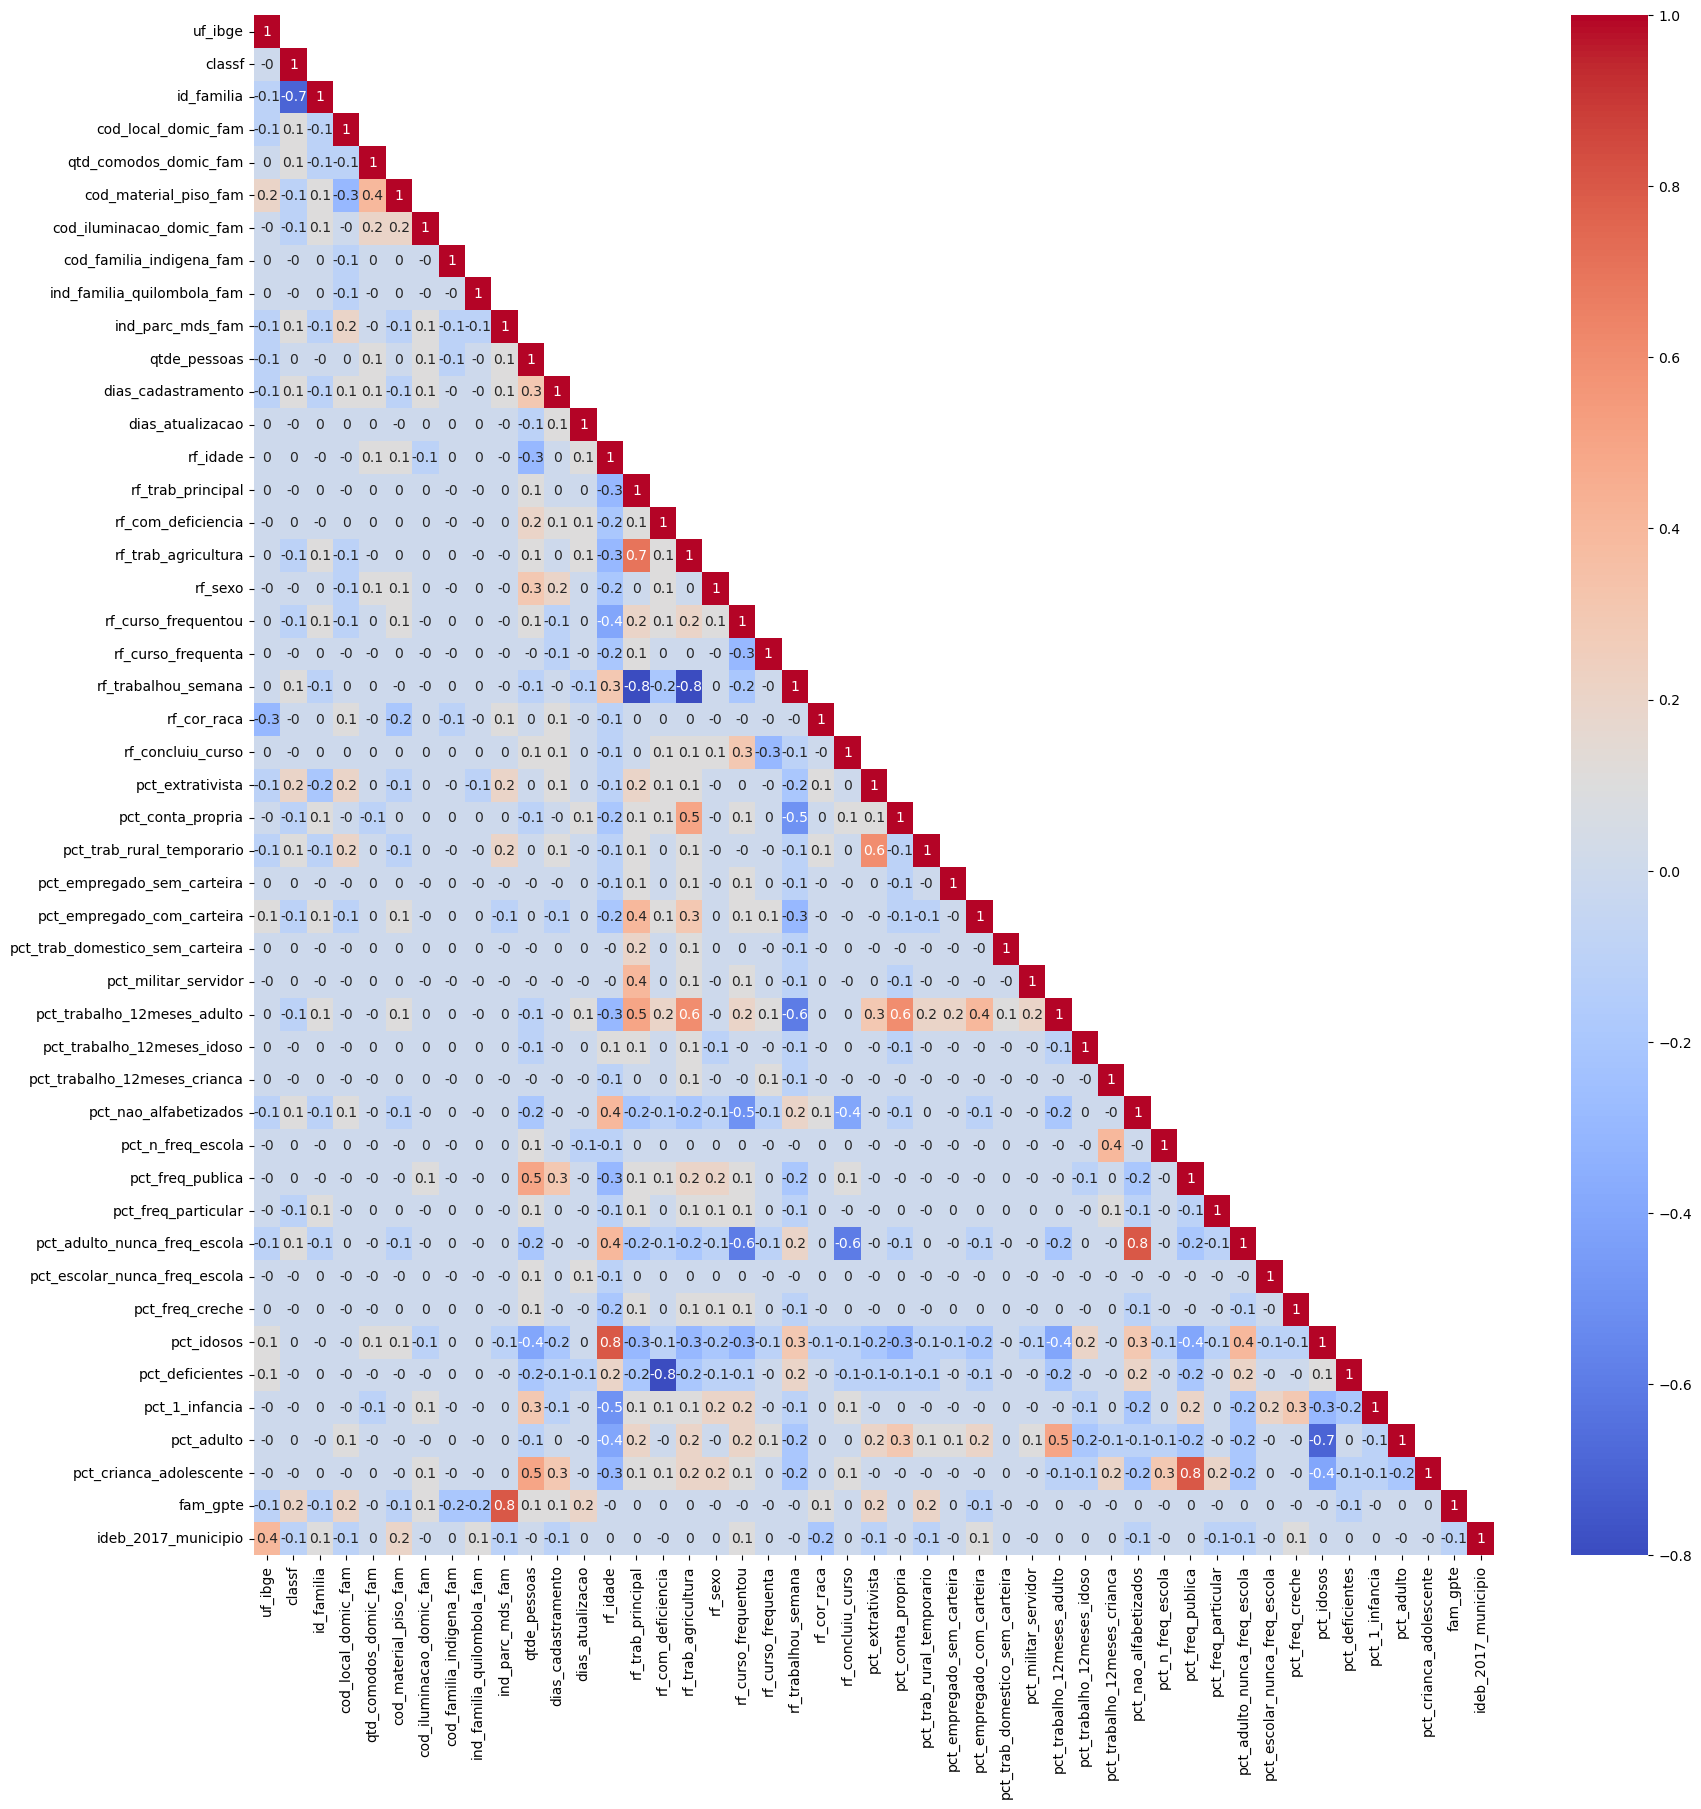

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96791 entries, 0 to 96790
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96791 non-null  int64  
 1   classf                           96791 non-null  int64  
 2   id_familia                       96791 non-null  int64  
 3   cod_local_domic_fam              96791 non-null  float64
 4   qtd_comodos_domic_fam            96791 non-null  float64
 5   cod_material_piso_fam            96791 non-null  float64
 6   cod_iluminacao_domic_fam         96791 non-null  float64
 7   cod_familia_indigena_fam         96791 non-null  float64
 8   ind_familia_quilombola_fam       96791 non-null  float64
 9   ind_parc_mds_fam                 96791 non-null  float64
 10  qtde_pessoas                     96791 non-null  int64  
 11  dias_cadastramento               96791 non-null  float64
 12  dias_atualizacao  

In [10]:
numeric_cols = df_features.select_dtypes(include=np.number).columns #47

In [11]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.8128946407705234
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.8128946407705234


In [12]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [13]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_

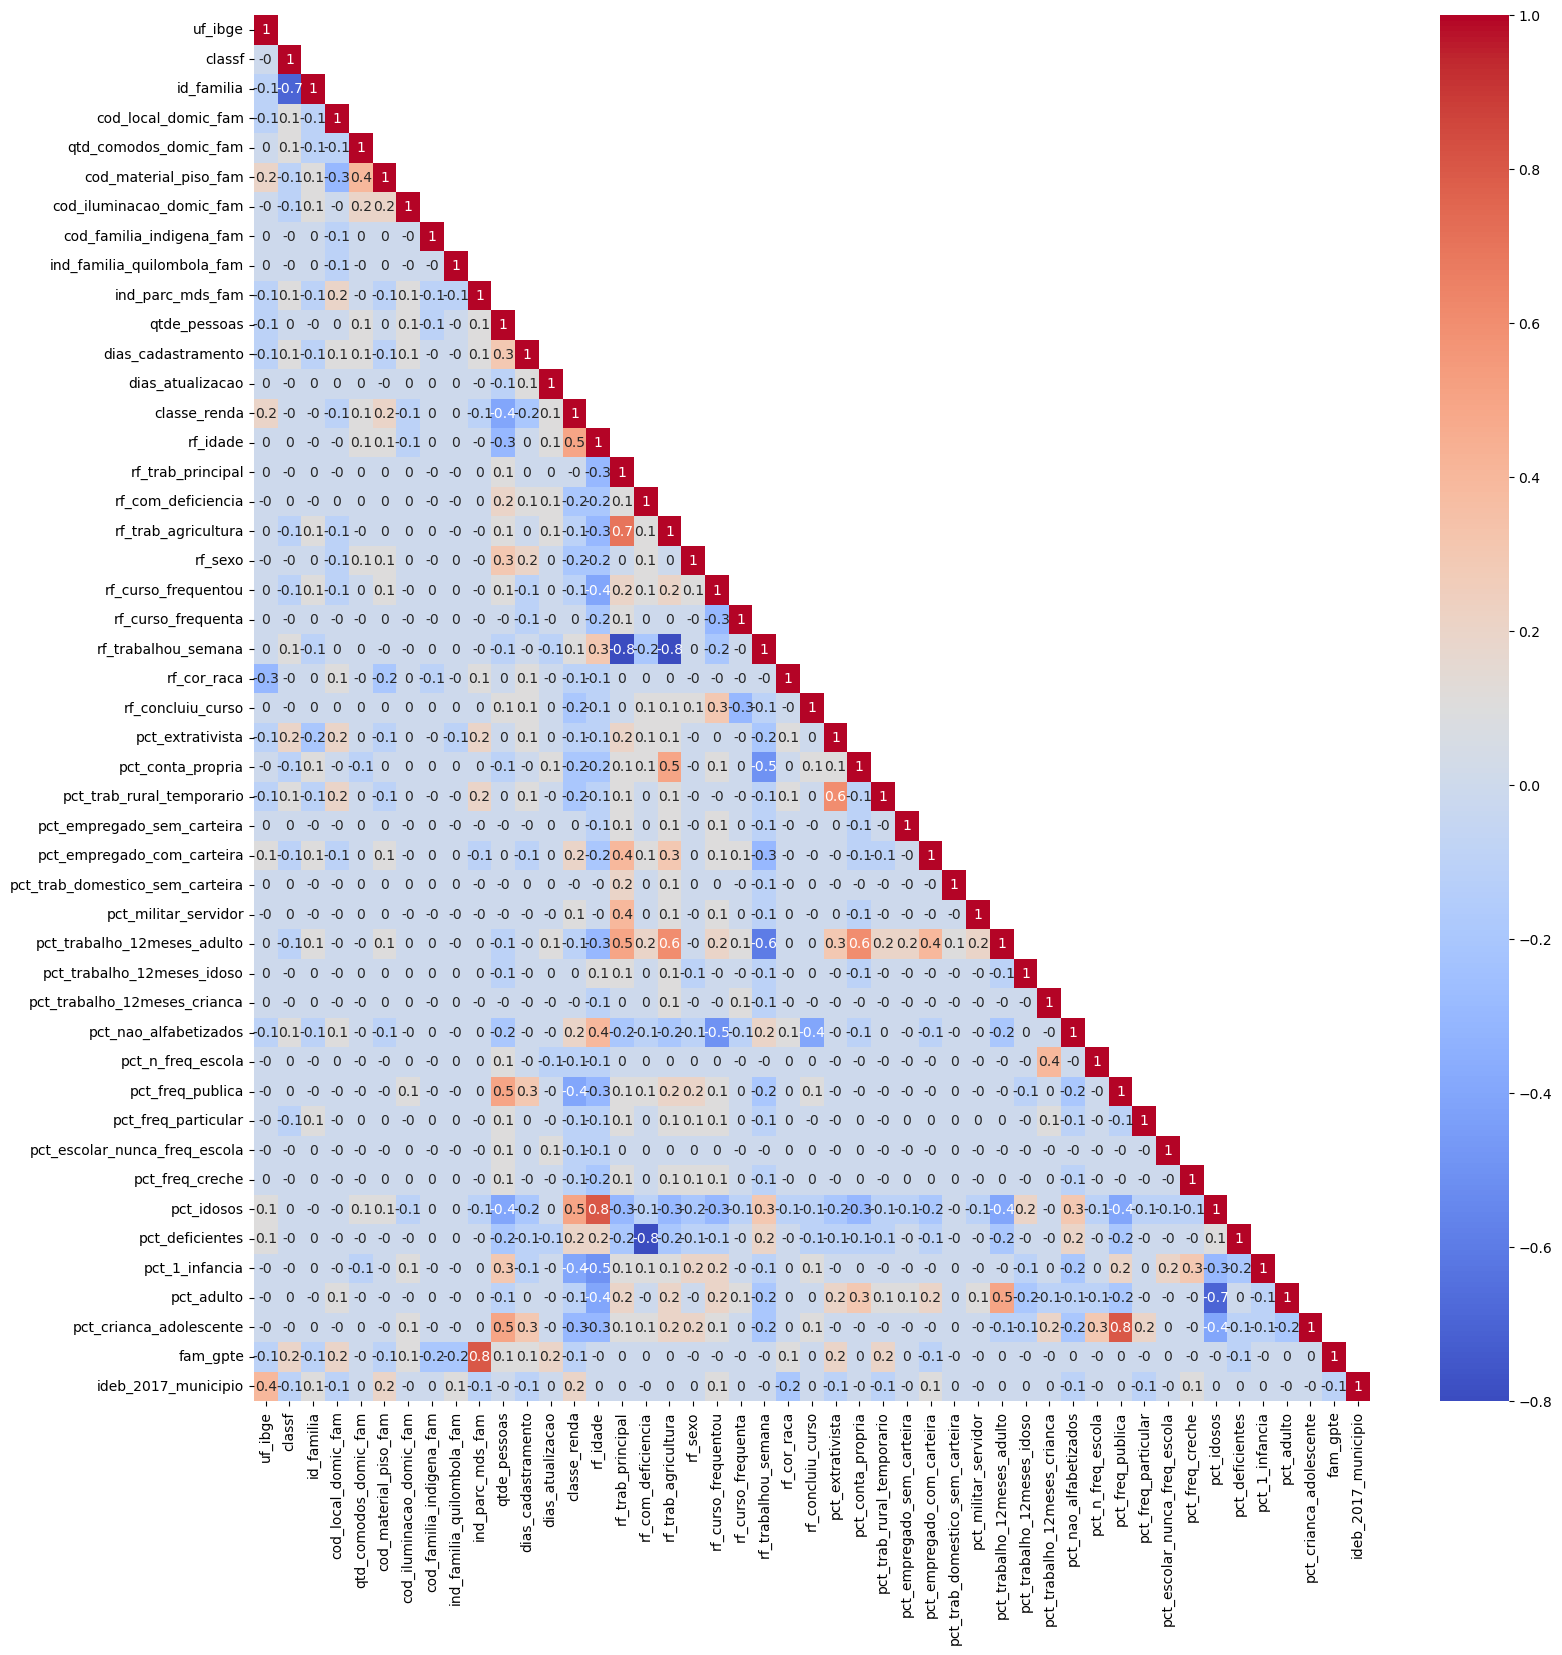

In [14]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'fam_gpte', 'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [15]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.8
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81


In [16]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_deficientes', 'rf_trab_agricultura'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,...,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,0.0,...,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,205.0,...,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.000000,0.0,4.6


In [17]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',


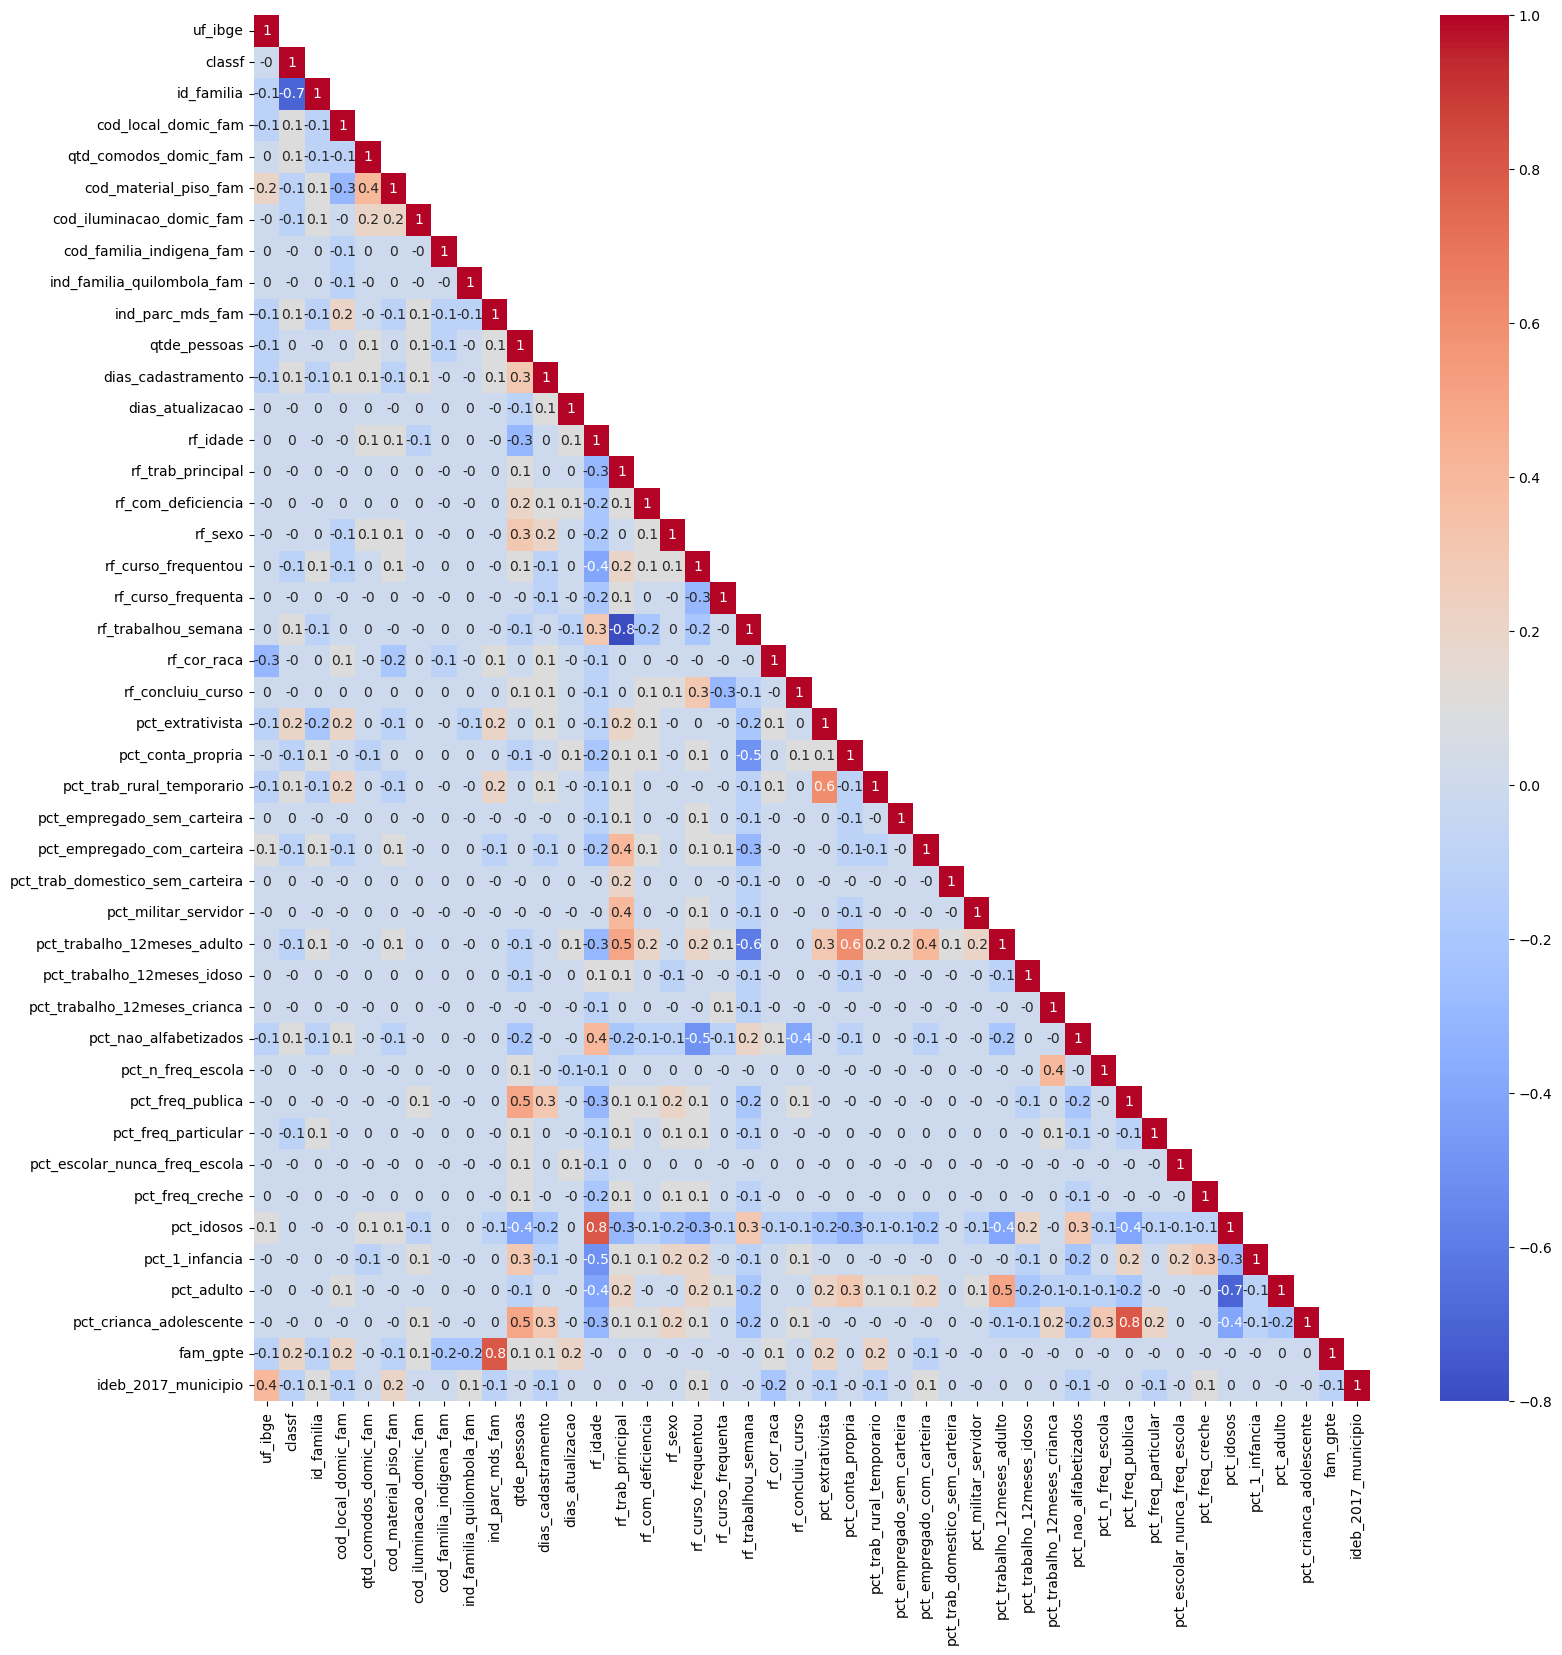

In [18]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'pct_crianca_adolescente', 'fam_gpte',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [19]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")


Colunas: ind_parc_mds_fam e fam_gpte, Correlação: 0.78
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80


In [20]:
#Retirando features com correlação > 7.5
df_balanceado = df_balanceado.drop(columns=['ind_parc_mds_fam', 'rf_trab_principal', 'pct_crianca_adolescente', 'rf_idade'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,2.0,2.0,3,...,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,2.0,2.0,8,...,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2.0,2.0,2,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,2.0,2.0,3,...,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,4.6


In [21]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_201

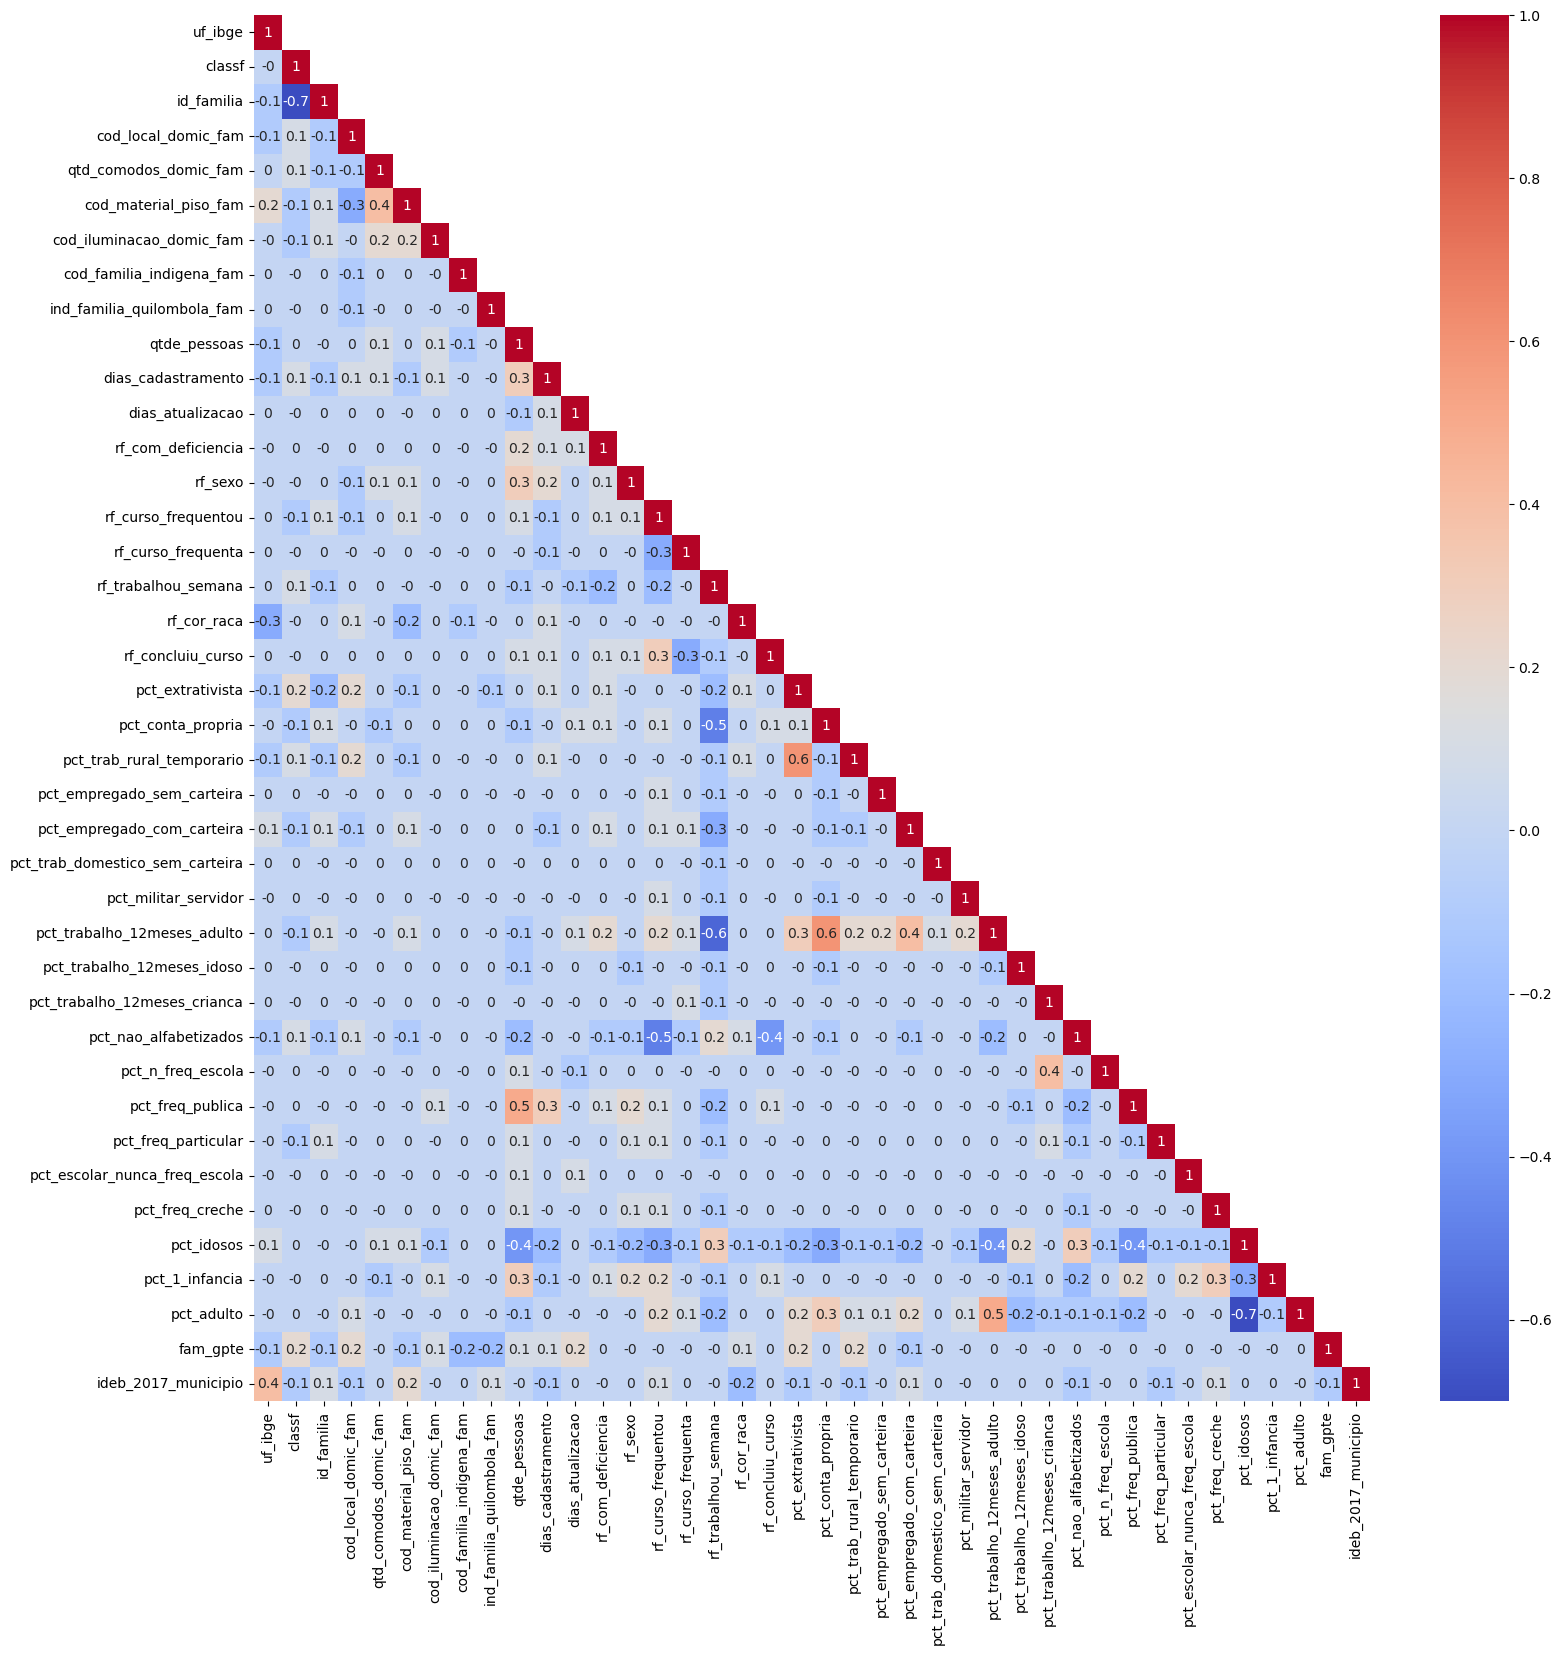

In [22]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_com_deficiencia', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto', 'fam_gpte', 'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [23]:
# Obter a matriz de correlação
corr_matrix = df_features.corr().abs()
threshold = 0.75

# Obter os índices de correlações altas, exceto a diagonal principal
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

# Imprimir os pares de correlação alta
if high_corr_list:  # Verifica se há pares na lista
    for col1, col2, corr_value in high_corr_list:
        print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")
else:
    print("Não tem correlações altas acima do limite estabelecido.")

Não tem correlações altas acima do limite estabelecido.


In [24]:
df_balanceado.shape

(96791, 41)

# Fazendo uma amostra de 10mil

In [25]:
df_balanceado.shape

(96791, 41)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definindo a amostra
sample_size = 10000

# Fazendo a amostragem estratificada
df_sample, _ = train_test_split(df_balanceado, 
                                 train_size=sample_size, 
                                 stratify=df_balanceado['classe_renda'], 
                                 random_state=42)

# Mostrando a amostra resultante
print(df_sample['classe_renda'].value_counts())


classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64


In [27]:
df_sample.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_gpte,ideb_2017_municipio
79712,52,1,4353387,1.0,5.0,2.0,1.0,2.0,2.0,1,...,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,0.0,5.9
36045,27,1,4569986,1.0,5.0,2.0,1.0,2.0,2.0,3,...,0.0,0.333333,0.0,0.00,0.0,0.0,0.00,0.666667,0.0,5.0
93095,35,2,2618787,1.0,5.0,5.0,1.0,2.0,2.0,2,...,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,0.0,6.2
78641,51,1,4301802,1.0,5.0,5.0,2.0,2.0,2.0,2,...,0.0,0.000000,0.0,0.00,0.0,0.0,0.50,0.500000,0.0,5.6
23557,35,1,5163090,1.0,3.0,5.0,1.0,2.0,2.0,4,...,0.0,0.500000,0.0,0.25,0.0,0.0,0.25,0.250000,0.0,6.3


## Criando uma função de processamento OneHotEncoder

In [28]:
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda'):
    
    # Definir colunas categóricas e numéricas
    binary_cols = ['cod_familia_indigena_fam', 'ind_familia_quilombola_fam', 'rf_com_deficiencia', 'rf_sexo', 'rf_trabalhou_semana', 'fam_gpte']  
    
    multiclass_cols = ['uf_ibge', 'classf', 'cod_local_domic_fam', 'cod_material_piso_fam', 'cod_iluminacao_domic_fam','rf_curso_frequentou','rf_curso_frequenta',
                      'rf_cor_raca', 'rf_concluiu_curso',] 
    
    numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 
    
    percentage_cols = ['pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_1_infancia', 'pct_adulto']  
       
 
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder, considerando os valores -1 como uma categoria válida
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    
    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df

In [29]:
#chamando a função
df_sample = preprocess_data(df_sample)
df_sample.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4353387,5.0,1,452.0,452,5.9,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,4569986,5.0,3,1111.0,237,5.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2618787,5.0,2,1802.0,346,6.2,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,4301802,5.0,2,28.0,28,5.6,0.5,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
4,5163090,3.0,4,1972.0,599,6.3,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


## Criando uma função de normalização das colunas quantitativas

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio'] 


In [31]:
# Chamando a função
df_sample = normalize_numerical_columns(df_sample, numerical_cols)
df_sample.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,...,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4353387,0.315789,0.0,0.066493,0.292339,0.683168,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,4569986,0.315789,0.2,0.167227,0.147849,0.594059,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2618787,0.315789,0.1,0.272852,0.221102,0.712871,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,4301802,0.315789,0.1,0.001681,0.007392,0.653465,0.5,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
4,5163090,0.210526,0.3,0.298838,0.391129,0.722772,0.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [32]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [33]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'cod_familia_indigena_fam_2.0', 'ind_familia_quilombola_fam_2.0', 'rf_com_deficiencia_2', 'rf_sexo_2', 'rf_trabalhou_semana_2.0', 'fam_gpte_1.0', 'uf_ibge_12', 'uf_ibge_13', 'uf_ibge_14', 'uf_ibge_15', 'uf_ibge_16', 'uf_ibge_17', 'uf_ibge_21', 'uf_ibge_22', 'uf_ibge_23', 'uf_ibge_24', 'uf_ibge_25', 'uf_ibge_26', 'uf_ibge_27', 'uf_ibge_28', 'uf_ibge_29', 'uf_ibge_31', 'uf_ibge_32', 'uf_ibge_33', 'uf_ibge_35'

## Criando uma função de renomear as novas colunas craidas 

In [34]:
import pandas as pd

def rename_columns(df, column_mapping):
    """
    Renomeia as colunas do DataFrame com base em um dicionário de mapeamento.

    Args:
        df (pd.DataFrame): DataFrame a ser atualizado.
        column_mapping (dict): Dicionário contendo os mapeamentos de nomes de colunas.

    Returns:
        pd.DataFrame: DataFrame com colunas renomeadas.
    """
    # Renomeando as colunas no DataFrame
    df = df.rename(columns=column_mapping)
    return df

# Dicionário com os novos nomes das colunas
new_column_names = {'fam_gpte_1.0': 'fam_gpte', 'cod_familia_indigena_fam_2.0': 'fam_indigena', 'ind_familia_quilombola_fam_2.0': 'fam_quilombola','rf_sexo_2': 'rf_feminino', 'rf_trabalhou_semana_2.0': 'rf_nao_trabalhou_semana', 'rf_com_deficiencia_2': 'rf_nao_deficiencia', 
    'rf_concluiu_curso_1.0': 'rf_concluiu_curso', 'rf_concluiu_curso_2.0': 'rf_nao_concluiu_curso','rf_cor_raca_2.0': 'rf_cor_preta', 'rf_cor_raca_3.0': 'rf_cor_amarela', 
    'rf_cor_raca_4.0': 'rf_cor_parda', 'rf_cor_raca_5.0': 'rf_cor_indigena', 'rf_curso_frequenta_4.0': 'rf_frequenta_fund_reg_8anos', 'rf_curso_frequenta_5.0': 'rf_frequenta_fund_reg_9anos', 
    'rf_curso_frequenta_6.0': 'rf_frequenta_fund_especial', 'rf_curso_frequenta_7.0': 'rf_frequenta_medio_reg', 'rf_curso_frequenta_8.0': 'rf_frequenta_medio_especial', 
    'rf_curso_frequenta_9.0': 'rf_frequenta_eja_iniciais', 'rf_curso_frequenta_10.0': 'rf_frequenta_eja_finais', 'rf_curso_frequenta_11.0': 'rf_frequenta_eja_medio', 
    'rf_curso_frequenta_12.0': 'rf_frequenta_alfab_adulto', 'rf_curso_frequenta_13.0': 'rf_frequenta_superior', 'rf_curso_frequentou_2.0': 'rf_frequentou_pre_escola', 
    'rf_curso_frequentou_3.0': 'rf_frequentou_alfab', 'rf_curso_frequentou_4.0': 'rf_frequentou_fund_iniciais', 'rf_curso_frequentou_5.0': 'rf_frequentou_fund_finais', 
    'rf_curso_frequentou_6.0': 'rf_frequentou_fund_9anos', 'rf_curso_frequentou_7.0':  'rf_frequentou_fund_especial', 'rf_curso_frequentou_8.0': 'rf_frequentou_medio', 
    'rf_curso_frequentou_9.0': 'rf_frequentou_media_especial', 'rf_curso_frequentou_10.0': 'rf_frequentou_eja_inicial', 'rf_curso_frequentou_11.0': 'rf_frequentou_eja_final', 
    'rf_curso_frequentou_12.0': 'rf_frequentou_eja_medio', 'rf_curso_frequentou_13.0': 'rf_frequentou_superior', 'rf_curso_frequentou_14.0': 'rf_frequentou_alfab_aulto', 
    'rf_curso_frequentou_15.0': 'rf_frequentou_nenhum_curso', 
    'cod_iluminacao_domic_fam_1.0': 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_domic_fam_2.0': 'cod_iluminacao_elet_com_medidor_comunitario', 
    'cod_iluminacao_domic_fam_3.0': 'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_domic_fam_4.0':'cod_iluminacao_oleo_gas', 'cod_iluminacao_domic_fam_5.0': 'cod_iluminacao_vela', 
    'cod_iluminacao_domic_fam_6.0': 'cod_iluminacao_outra', 'cod_material_piso_fam_1.0':  'cod_piso_terra', 'cod_material_piso_fam_2.0': 'cod_piso_cimento', 
    'cod_material_piso_fam_3.0': 'cod_piso_madeira_aproveitada', 'cod_material_piso_fam_4.0': 'cod_piso_madeira_aparelhada', 'cod_material_piso_fam_5.0': 'cod_piso_ceramica', 
    'cod_material_piso_fam_6.0': 'cod_piso_carpete', 'cod_material_piso_fam_7.0': 'cod_piso_outro_material', 'cod_local_domic_fam_2.0': 'cod_local_domic_rural', 
    'cod_local_domic_fam_9.0': 'cod_local_domic_outra', 'classf_2': 'reg_metropolitana', 'classf_3': 'outra_div_administrativa', 'uf_ibge_12': 'AC', 'uf_ibge_13': 'AM', 'uf_ibge_14': 'RR', 
    'uf_ibge_15': 'PA', 'uf_ibge_16': 'AP', 'uf_ibge_17': 'TO', 'uf_ibge_21': 'MA', 'uf_ibge_22': 'PI', 'uf_ibge_23': 'CE', 'uf_ibge_24': 'RN', 'uf_ibge_25': 'PB', 'uf_ibge_26': 'PE', 
    'uf_ibge_27': 'AL', 'uf_ibge_28': 'SE', 'uf_ibge_29': 'BA', 'uf_ibge_31': 'MG', 'uf_ibge_32': 'ES', 'uf_ibge_33': 'RJ', 'uf_ibge_35': 'SP', 'uf_ibge_41': 'PR', 'uf_ibge_42': 'SC', 
    'uf_ibge_43': 'RS', 'uf_ibge_50': 'MS', 'uf_ibge_51': 'MT', 'uf_ibge_52': 'GO', 'uf_ibge_53': 'DF'
}

In [35]:
# Chamando a função
df_sample = rename_columns(df_sample, new_column_names)
df_sample.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_indigena,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso,classe_renda
0,4353387,0.315789,0.0,0.066493,0.292339,0.683168,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,4569986,0.315789,0.2,0.167227,0.147849,0.594059,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.00,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2618787,0.315789,0.1,0.272852,0.221102,0.712871,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,4301802,0.315789,0.1,0.001681,0.007392,0.653465,0.5,0.00,0.0,0.0,0.5,0.0,0.0,0.50,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.50,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
4,5163090,0.210526,0.3,0.298838,0.391129,0.722772,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.500000,0.0,0.25,0.0,0.0,0.25,0.250000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [36]:
print(df_sample.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_indigena', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_pi

## Correlacao

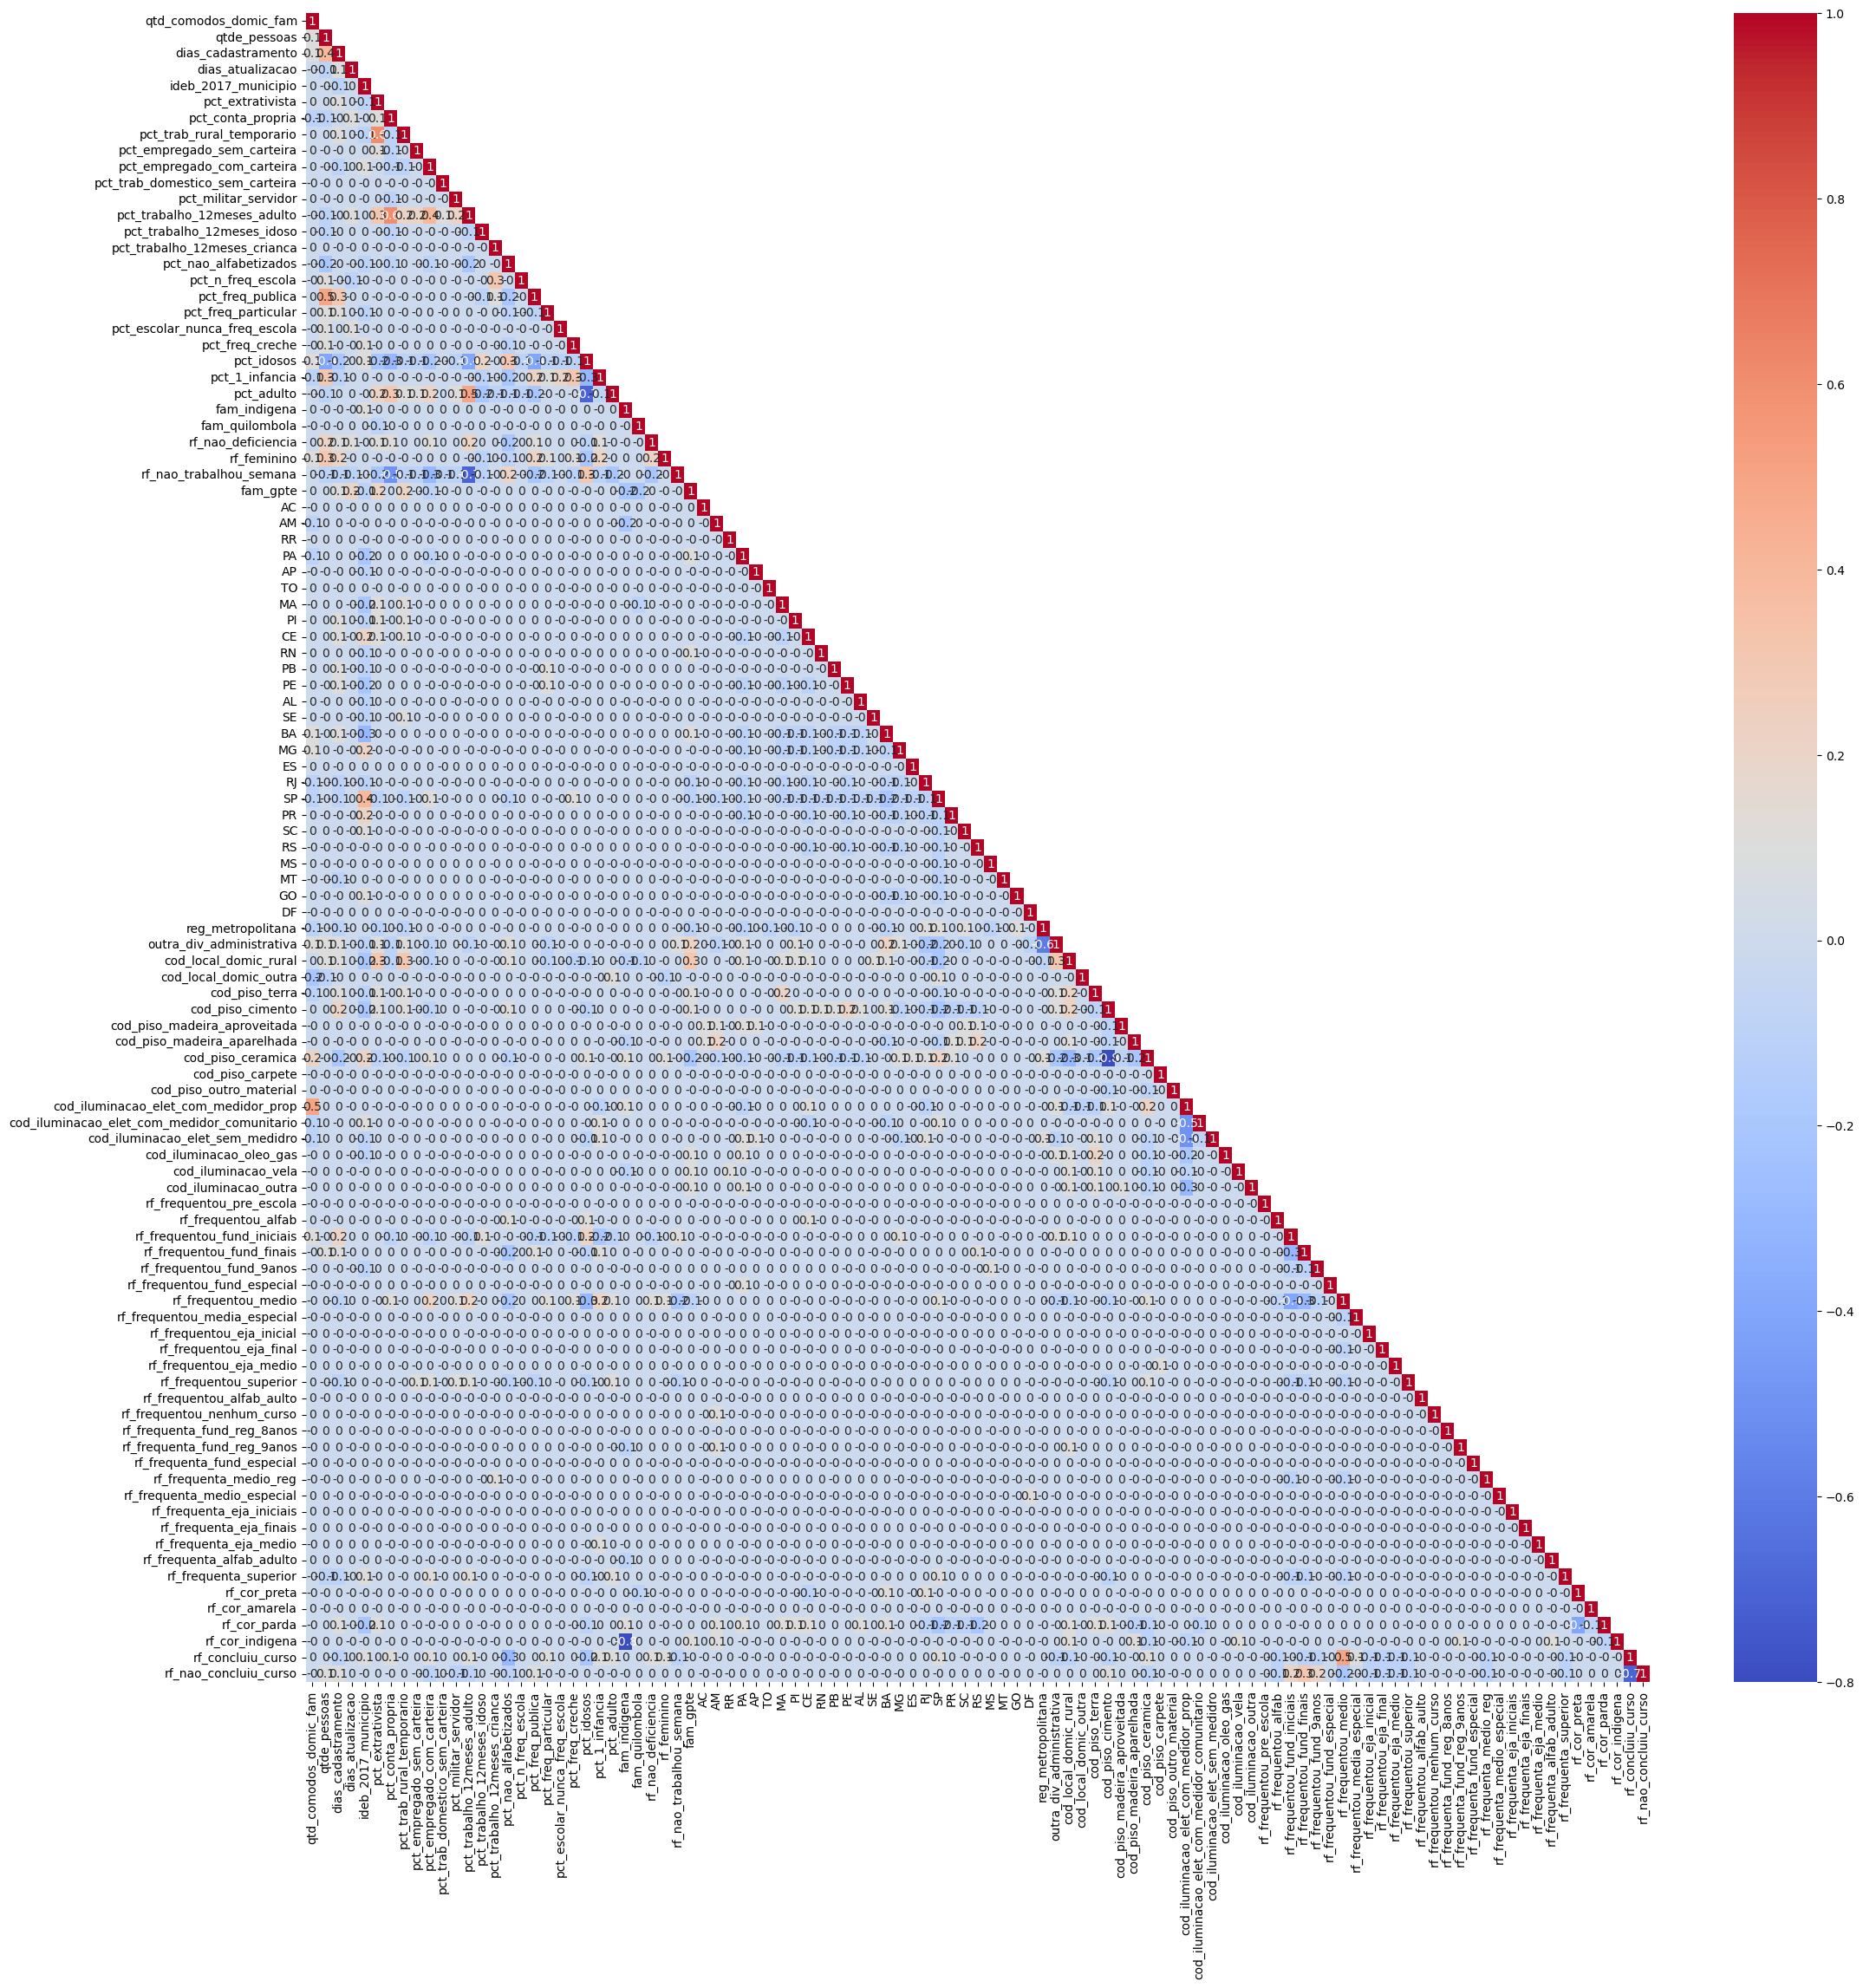

In [37]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_sample[['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 
                         'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 
                         'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 
                         'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_indigena', 'fam_quilombola', 
                         'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE',
                         'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 'cod_local_domic_rural', 'cod_local_domic_outra',
                         'cod_piso_terra', 'cod_piso_cimento', 'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material',
                         'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela',
                         'cod_iluminacao_outra', 'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos', 
                         'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final', 'rf_frequentou_eja_medio',
                         'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 
                         'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 
                         'rf_frequenta_superior', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_concluiu_curso', 'rf_nao_concluiu_curso']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [38]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.75
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: fam_indigena e rf_cor_indigena, Correlação: 0.83
Colunas: cod_piso_cimento e cod_piso_ceramica, Correlação: 0.77


In [39]:
df_sample = df_sample.drop(columns=['fam_indigena', 'cod_piso_cimento'])

## Seleção das variáveis independentes (Features)

In [40]:
# Exibir todas as colunas do DataFrame final
print(df_sample.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_madeira_aproveitada', 'cod_piso_m

In [41]:
# Selecionando as variáveis que serão utilizadas para o modelo
X_sample = df_sample[[ 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 
                      'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                      'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 
                      'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 
                      'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 
                      'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete',
                      'cod_piso_outro_material', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_oleo_gas', 
                      'cod_iluminacao_vela', 'cod_iluminacao_outra', 'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 
                      'rf_frequentou_fund_9anos', 'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final', 
                      'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 
                      'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 
                      'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_concluiu_curso', 'rf_nao_concluiu_curso']]
y_sample = df_sample['classe_renda']

# Exibindo as informações de X
print('X_sample =', X_sample.shape)
X_sample.head()

X_sample = (10000, 101)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso
0,0.315789,0.0,0.066493,0.292339,0.683168,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.2,0.167227,0.147849,0.594059,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.333333,0.0,0.00,0.0,0.0,0.00,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.315789,0.1,0.272852,0.221102,0.712871,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.000000,0.0,0.00,0.0,1.0,0.00,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.315789,0.1,0.001681,0.007392,0.653465,0.5,0.00,0.0,0.0,0.5,0.0,0.0,0.50,0.0,0.0,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.50,0.500000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.210526,0.3,0.298838,0.391129,0.722772,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.500000,0.0,0.25,0.0,0.0,0.25,0.250000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
# Verificar se há algum valor nulo no dataframe X
nulos = X_sample.isnull().sum()

# Exibir apenas as colunas que têm valores nulos
nulos_com_valores = nulos[nulos > 0]

print("Colunas com valores nulos e suas quantidades:")
print(nulos_com_valores)


Colunas com valores nulos e suas quantidades:
Series([], dtype: int64)


In [43]:
y_sample.head()

0    2
1    1
2    2
3    2
4    0
Name: classe_renda, dtype: int64

In [44]:
X_sample.describe()

,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.279895,0.145110,0.336676,0.278163,0.645498,0.044033,0.117527,0.020605,0.009394,0.060311,0.003423,0.011033,0.243383,0.014285,0.003920,0.134140,0.013985,0.157271,0.013645,0.006253,0.010680,0.227686,0.103451,0.515952,0.995000,0.91550,0.80000,0.664600,0.103600,0.00350,0.019800,0.003600,0.046900,0.003600,0.011600,0.044300,0.023100,0.064200,0.020700,0.029400,0.062600,0.023400,0.014800,0.103800,0.096700,0.017000,0.058900,0.163400,0.050000,0.015100,0.037300,0.018000,0.020400,0.033500,0.005200,0.222100,0.582800,0.161800,0.003400,0.030800,0.01430,0.034000,0.52480,0.000900,0.004900,0.836600,0.054100,0.042300,0.005000,0.003300,0.016700,0.000300,0.006800,0.262500,0.212900,0.03060,0.004300,0.295000,0.006900,0.004100,0.006300,0.004000,0.026700,0.002300,0.00110,0.00110,0.001500,0.000200,0.007400,0.000200,0.00110,0.002800,0.002600,0.000200,0.013100,0.088800,0.006100,0.593800,0.004700,0.408800,0.403400
std,0.093198,0.136125,0.3

In [45]:
y_sample.describe()

count    10000.000000
mean         1.007200
std          0.818667
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

In [46]:
y_sample.value_counts()

classe_renda
2    3387
0    3315
1    3298
Name: count, dtype: int64

In [47]:
y_sample.isnull().sum()

0

In [48]:
# Dividir os dados em treino e teste
X_sample_train, X_sample_test, y_sample_train, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

In [49]:
y_sample_train.describe()

count    8000.000000
mean        1.007250
std         0.818707
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: classe_renda, dtype: float64

## Estimação padrão

In [50]:
%%time 

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

random_state=42

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dicionário de modelos com hiperparâmetros para otimização
models = {
    'Random Forest': (RandomForestClassifier(random_state=random_state), {
        'n_estimators': [300],
        'max_depth': [None, 20, 30],
        'min_samples_split': [2,5],
        'criterion':['gini','entropy']
    }),
    'XGBoost': (XGBClassifier(objective='multi:softmax', 
                               num_class=3, 
                               random_state=random_state), {
        'n_estimators': [200,300],
        'max_depth': [10,20],
        'learning_rate': [0.1]
    }),
    'CatBoost': (CatBoostClassifier(silent=True,
                                   random_state=random_state 
                                    ), {
        'iterations': [200,500],
        'depth': [7,9],
        'learning_rate': [0.1],
        'loss_function':['MultiClass']
    })
}

# Avaliando e treinando cada modelo
for model_name, (model, param_grid) in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Ajuste de hiperparâmetros com GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_sample_train, y_sample_train)
    
    # Melhor estimador encontrado e seus parâmetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Melhores parâmetros para {model_name}: {best_params}")
    
    # Avaliando o modelo com validação cruzada usando os melhores parâmetros
    scores = cross_val_score(best_model, X_sample_train, y_sample_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo com os melhores parâmetros e fazendo previsões
    best_model.fit(X_sample_train, y_sample_train)  # Treinando o modelo
    y_pred = best_model.predict(X_sample_test)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_sample_test, y_pred))
    print("Acurácia:", accuracy_score(y_sample_test, y_pred))
    print("-" * 50)  # Separador entre os modelos

Avaliando modelo: Random Forest
Melhores parâmetros para Random Forest: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Scores de validação cruzada: [0.715625 0.708125 0.706875 0.70125  0.70875 ]
Acurácia média: 0.7081250000000001
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       663
           1       0.66      0.59      0.62       660
           2       0.76      0.78      0.77       677

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

Acurácia: 0.718
--------------------------------------------------
Avaliando modelo: XGBoost
Melhores parâmetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Scores de validação cruzada: [0.70375  0.69375  0.688125 0.695625 0.705625]
Acurácia média: 0.697375
Relatório de classificação:
    

## Avaliando as features mais importantes

In [51]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_sample_test, y_sample_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_sample_test, y_sample_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_sample_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    return feature_importance_temp

# Lista para armazenar as importâncias de todos os modelos
all_importances = []

# Calcular as importâncias usando os melhores modelos ajustados
for model_name, (model, param_grid) in models.items():
    print(f"Calculando a importância das features para o modelo: {model_name}")
    
    # Ajuste dos hiperparâmetros com GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_sample_train, y_sample_train)
    best_model = grid_search.best_estimator_
    print(f"Melhores parâmetros para {model_name}: {grid_search.best_params_}")
    
    # Calcular a importância das features usando o modelo ajustado
    feature_importance_temp = calcular_importancia(best_model, X_sample_test, y_sample_test, model_name)
    all_importances.append(feature_importance_temp)

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)

Calculando a importância das features para o modelo: Random Forest
Melhores parâmetros para Random Forest: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Calculando a importância das features para o modelo: XGBoost
Melhores parâmetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Calculando a importância das features para o modelo: CatBoost
Melhores parâmetros para CatBoost: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1, 'loss_function': 'MultiClass'}
                   Feature   Importância  Desvio_Padrao         Modelo
0    qtd_comodos_domic_fam  7.166667e-03       0.004327  Random Forest
1             qtde_pessoas  3.216667e-02       0.005328  Random Forest
2       dias_cadastramento  4.666667e-03       0.000943  Random Forest
3         dias_atualizacao  8.666667e-03       0.004288  Random Forest
4      ideb_2017_municipio  1.883333e-02       0.000850  Random Forest
..                     ...           ...  

In [52]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))


Features com importância maior que a mediana para o modelo Random Forest:

                             Feature  Importância
               qtd_comodos_domic_fam     0.007167
                        qtde_pessoas     0.032167
                  dias_cadastramento     0.004667
                    dias_atualizacao     0.008667
                 ideb_2017_municipio     0.018833
                   pct_conta_propria     0.018167
          pct_empregado_com_carteira     0.046167
                pct_militar_servidor     0.003333
         pct_trabalho_12meses_adulto     0.016000
        pct_trabalho_12meses_crianca     0.000500
               pct_nao_alfabetizados     0.001667
                   pct_n_freq_escola     0.001333
                    pct_freq_publica     0.007000
                          pct_idosos     0.075167
                      pct_1_infancia     0.014667
                          pct_adulto     0.008833
                  rf_nao_deficiencia     0.006500
             rf_nao_trab

In [53]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,qtd_comodos_domic_fam,0.007167,0.004327,Random Forest
1,qtde_pessoas,0.032167,0.005328,Random Forest
2,dias_cadastramento,0.004667,0.000943,Random Forest
3,dias_atualizacao,0.008667,0.004288,Random Forest
4,ideb_2017_municipio,0.018833,0.000850,Random Forest


In [54]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features:
    print(feature)

Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
rf_frequenta_medio_reg
pct_trabalho_12meses_idoso
rf_cor_preta
rf_frequentou_fund_iniciais
pct_trabalho_12meses_adulto
pct_idosos
outra_div_administrativa
rf_frequentou_fund_9anos
rf_cor_parda
rf_frequentou_medio
PE
ideb_2017_municipio
cod_iluminacao_outra
pct_empregado_sem_carteira
pct_freq_particular
qtd_comodos_domic_fam
dias_cadastramento
CE
GO
AM
SE
MT
pct_militar_servidor
BA
MA
pct_escolar_nunca_freq_escola
rf_frequentou_alfab
rf_nao_trabalhou_semana
pct_extrativista
cod_iluminacao_elet_com_medidor_prop
fam_gpte
pct_trabalho_12meses_crianca
pct_1_infancia
rf_nao_deficiencia
AL
rf_frequentou_superior
SP
cod_local_domic_outra
pct_empregado_com_carteira
cod_piso_ceramica
PR
pct_n_freq_escola
dias_atualizacao
qtde_pessoas
MG
cod_iluminacao_elet_com_medidor_comunitario
cod_piso_madeira_aparelhada
RS
ES
rf_frequentou_fund_finais
SC
MS
cod_local_domic_rural
cod_piso_terra
cod_piso_madeira_aproveitada
PA

# Base total df_balanced

## Chamando a função de processamento OneHotEncoder

In [55]:
# Chamando a função criada para transformar as variáveis categóricas
df_balanceado = preprocess_data(df_balanceado)

In [56]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam_2.0,ind_familia_quilombola_fam_2.0,rf_com_deficiencia_2,rf_sexo_2,rf_trabalhou_semana_2.0,fam_gpte_1.0,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_2,classf_3,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,rf_curso_frequentou_1.0,rf_curso_frequentou_2.0,rf_curso_frequentou_3.0,rf_curso_frequentou_4.0,rf_curso_frequentou_5.0,rf_curso_frequentou_6.0,rf_curso_frequentou_7.0,rf_curso_frequentou_8.0,rf_curso_frequentou_9.0,rf_curso_frequentou_10.0,rf_curso_frequentou_11.0,rf_curso_frequentou_12.0,rf_curso_frequentou_13.0,rf_curso_frequentou_14.0,rf_curso_frequentou_15.0,rf_curso_frequenta_3.0,rf_curso_frequenta_4.0,rf_curso_frequenta_5.0,rf_curso_frequenta_6.0,rf_curso_frequenta_7.0,rf_curso_frequenta_8.0,rf_curso_frequenta_9.0,rf_curso_frequenta_10.0,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4736936,2.0,3,3290.0,510,4.8,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,4.0,8,1774.0,101,4.6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,4.0,2,1966.0,598,4.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,5.0,2,812.0,285,4.2,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4194

## Chamando a função para normalização das colunas quantitativas

In [57]:
# Chamando a função de normalização das colunas quantitativas
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)

In [58]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,cod_familia_indigena_fam_2.0,ind_familia_quilombola_fam_2.0,rf_com_deficiencia_2,rf_sexo_2,rf_trabalhou_semana_2.0,fam_gpte_1.0,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_2,classf_3,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,rf_curso_frequentou_1.0,rf_curso_frequentou_2.0,rf_curso_frequentou_3.0,rf_curso_frequentou_4.0,rf_curso_frequentou_5.0,rf_curso_frequentou_6.0,rf_curso_frequentou_7.0,rf_curso_frequentou_8.0,rf_curso_frequentou_9.0,rf_curso_frequentou_10.0,rf_curso_frequentou_11.0,rf_curso_frequentou_12.0,rf_curso_frequentou_13.0,rf_curso_frequentou_14.0,rf_curso_frequentou_15.0,rf_curso_frequenta_3.0,rf_curso_frequenta_4.0,rf_curso_frequenta_5.0,rf_curso_frequenta_6.0,rf_curso_frequenta_7.0,rf_curso_frequenta_8.0,rf_curso_frequenta_9.0,rf_curso_frequenta_10.0,rf_curso_frequenta_11.0,rf_curso_frequenta_12.0,rf_curso_frequenta_13.0,rf_curso_frequenta_14.0,rf_cor_raca_2.0,rf_cor_raca_3.0,rf_cor_raca_4.0,rf_cor_raca_5.0,rf_concluiu_curso_1.0,rf_concluiu_curso_2.0,classe_renda
0,4736936,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Chamando a função para revisão do nome das colunas

In [59]:
# Chamando a função para revisão do nome das colunas
df_balanceado = rename_columns(df_balanceado, new_column_names)

In [60]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_indigena,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso,classe_renda
0,4736936,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4194650,0.285714,0.166667,0.879700,0.385753,0.554455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000,0.333333,0.0,0.0,0.0,0.

In [61]:
# Verificar a presença de valores NaN
print(df_balanceado.isnull().sum().sum())

0


In [62]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_indigena', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_pi

## Criando o dataframe X e a variável target y

In [63]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado[[  'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 
                   'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
                   'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 
                   'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_indigena', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA',
                   'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa',
                   'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 
                   'cod_piso_carpete', 'cod_piso_outro_material', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 
                   'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'rf_curso_frequentou_1.0', 'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais',
                   'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos', 'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 
                   'rf_frequentou_eja_final', 'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_curso_frequenta_3.0', 
                   'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais',
                   'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_curso_frequenta_14.0', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda',
                   'rf_cor_indigena', 'rf_concluiu_curso', 'rf_nao_concluiu_curso']]
y = df_balanceado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 106)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_indigena,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso
0,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.285714,0.166667,0.879700,0.385753,0.554455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [64]:
# Verificar a presença de valores NaN
print(X.isnull().sum())

qtd_comodos_domic_fam    0
qtde_pessoas             0
dias_cadastramento       0
dias_atualizacao         0
ideb_2017_municipio      0
                        ..
rf_cor_amarela           0
rf_cor_parda             0
rf_cor_indigena          0
rf_concluiu_curso        0
rf_nao_concluiu_curso    0
Length: 106, dtype: int64


In [65]:
y.tail()

96786    2
96787    2
96788    2
96789    2
96790    2
Name: classe_renda, dtype: int64

In [66]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [67]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Treinando os modelos com validação cruzada

In [68]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=random_state),
        'param_grid': {
            'classifier__n_estimators': [300],
            'classifier__max_depth': [None, 20, 30],
            'classifier__min_samples_split': [2,5],
            'classifier__criterion':['gini','entropy']
            
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True, random_state=random_state),
        'param_grid': {
            'classifier__iterations': [200, 500],
            'classifier__depth': [7,9],
            'classifier__learning_rate': [0.1],
            'classifier__loss_function':['MultiClass']
    }
  }
}

In [69]:
%%time

# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        #('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para RandomForest: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 7, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1, 'classifier__loss_function': 'MultiClass'}
CPU times: total: 2min 55s
Wall time: 11min 42s


## Avaliando os modelos

In [70]:
from sklearn.metrics import accuracy_score, f1_score

In [71]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    
    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")

Modelo: RandomForest
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: XGBoost
  F1 Score: 0.73
  Acurácia: 0.73
Modelo: CatBoost
  F1 Score: 0.74
  Acurácia: 0.74


In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

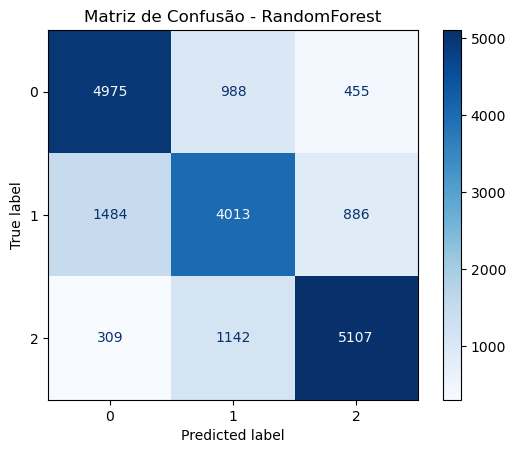

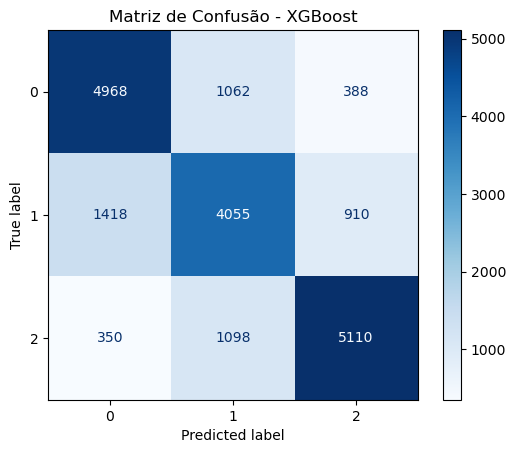

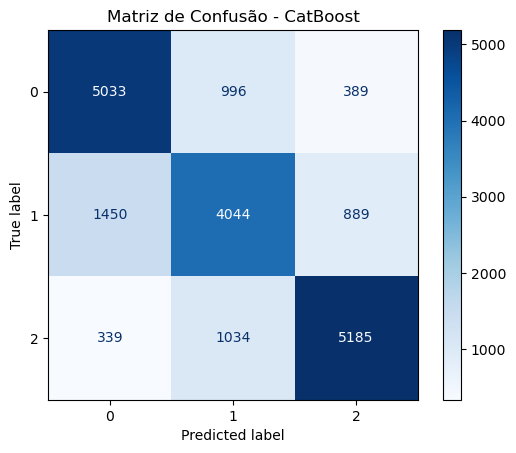

In [73]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

## Fazendo um ensemble com os modelos treinados

In [74]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# Criar Ensemble com Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['RandomForest']),  # Melhor estimador Random Forest
        ('xgb', best_models['XGBoost']),      # Melhor estimador XGBoost
        ('cat', best_models['CatBoost'])       # Melhor estimador CatBoost
    ],
    voting='hard'  # Usar 'hard' para voto majoritário
)



In [75]:
for model_name, model in best_models.items():
    unique_classes = set(model.classes_)
    print(f"{model_name} classes: {unique_classes}")

RandomForest classes: {0, 1, 2}
XGBoost classes: {0, 1, 2}
CatBoost classes: {0, 1, 2}


In [76]:
# Criar Ensemble com Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['RandomForest']),
        ('xgb', best_models['XGBoost']),
        ('cat', best_models['CatBoost'])
    ],
    voting='soft'  # Mude para 'soft' para combinar as probabilidades
)

# Ajustar o ensemble com o conjunto de treino
voting_clf.fit(X_train, y_train)

# Fazer previsões com o ensemble
y_pred_ensemble = voting_clf.predict(X_test)

# Avaliar Ensemble
print("Relatório de Classificação - Ensemble (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))

Relatório de Classificação - Ensemble (Voting Classifier):
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      6418
           1       0.66      0.64      0.65      6383
           2       0.80      0.79      0.79      6558

    accuracy                           0.74     19359
   macro avg       0.73      0.74      0.73     19359
weighted avg       0.74      0.74      0.74     19359



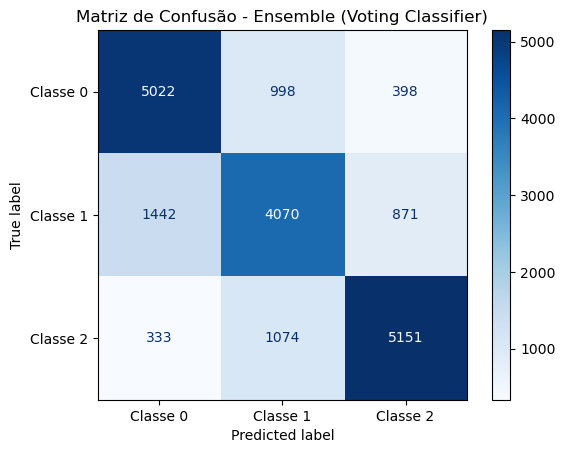

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de Confusão para o Ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=['Classe 0', 'Classe 1', 'Classe 2'])
disp_ensemble.plot(cmap='Blues')
plt.title('Matriz de Confusão - Ensemble (Voting Classifier)')
plt.show()

## Carregando as features em um dataframe e gerando gráfico apenas com as features com importância > 0.0

In [78]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Inicializar um DataFrame global para armazenar todas as importâncias
feature_importance_df = pd.DataFrame()

# Função para calcular e armazenar a importância para um modelo
def calcular_importancia(model, X_test, y_test, model_name):
    global feature_importance_df
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42, n_jobs=-1)  # n_repeats reduzido e n_jobs adicionado
    
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    feature_importance_temp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importância': importance_vals,
        'Desvio_Padrao': importance_std,
        'Modelo': model_name
    })
    
    # Concatenar uma única vez no final para melhorar a eficiência
    return feature_importance_temp

# Calcular importâncias para cada modelo
all_importances = []

all_importances.append(calcular_importancia(best_models['RandomForest'], X_test, y_test, 'RandomForest'))
all_importances.append(calcular_importancia(best_models['XGBoost'], X_test, y_test, 'XGBoost'))
all_importances.append(calcular_importancia(best_models['CatBoost'], X_test, y_test, 'CatBoost'))

# Concatenar todos os resultados de uma vez
feature_importance_df = pd.concat(all_importances, ignore_index=True)

# Visualizar o DataFrame com as importâncias de todos os modelos
print(feature_importance_df)


C:\ProgramData\Anaconda3\envs\botcamp\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


                   Feature  Importância  Desvio_Padrao        Modelo
0    qtd_comodos_domic_fam     0.003323       0.001260  RandomForest
1             qtde_pessoas     0.039120       0.000785  RandomForest
2       dias_cadastramento     0.008248       0.000818  RandomForest
3         dias_atualizacao     0.008850       0.000885  RandomForest
4      ideb_2017_municipio     0.006956       0.000829  RandomForest
..                     ...          ...            ...           ...
313         rf_cor_amarela    -0.000121       0.000024      CatBoost
314           rf_cor_parda     0.000775       0.000511      CatBoost
315        rf_cor_indigena     0.000052       0.000112      CatBoost
316      rf_concluiu_curso     0.000792       0.000422      CatBoost
317  rf_nao_concluiu_curso     0.001068       0.000064      CatBoost

[318 rows x 4 columns]


In [79]:
feature_importance_df.head()

,Feature,Importância,Desvio_Padrao,Modelo
0,qtd_comodos_domic_fam,0.003323,0.001260,RandomForest
1,qtde_pessoas,0.039120,0.000785,RandomForest
2,dias_cadastramento,0.008248,0.000818,RandomForest
3,dias_atualizacao,0.008850,0.000885,RandomForest
4,ideb_2017_municipio,0.006956,0.000829,RandomForest


In [80]:
# Filtrar apenas as features com importância > 0
feature_importance_df = feature_importance_df[feature_importance_df['Importância'] > 0.0]

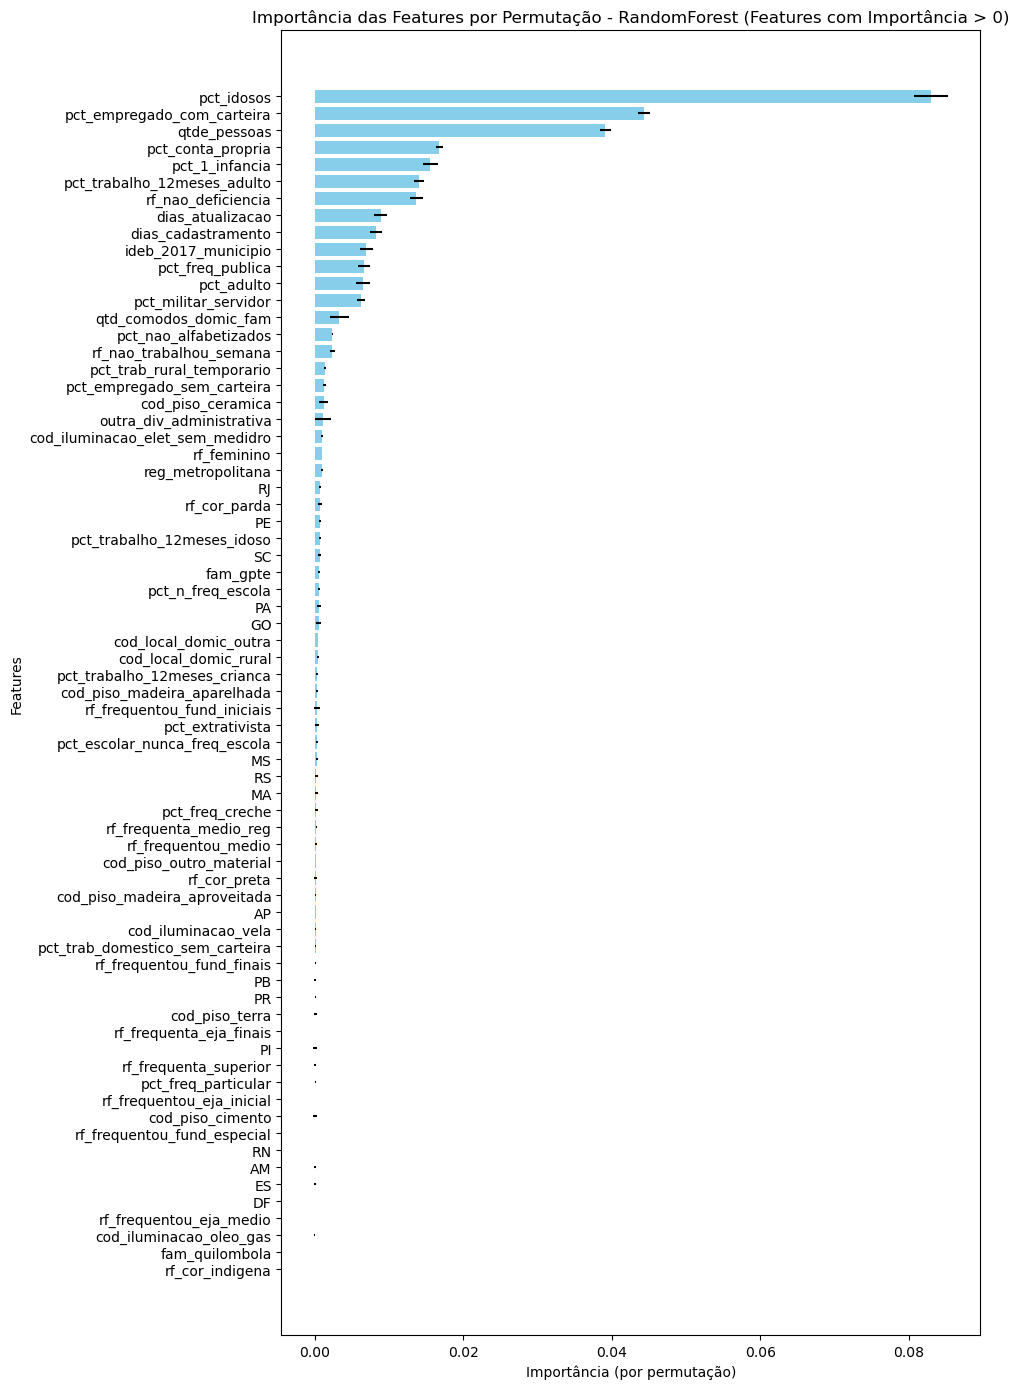

In [81]:
# Filtrar e ordenar dados para o modelo RandomForest
random_forest_group = feature_importance_df[feature_importance_df['Modelo'] == 'RandomForest']
random_forest_group = random_forest_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo RandomForest
plt.figure(figsize=(10, 14))
plt.barh(random_forest_group['Feature'], random_forest_group['Importância'], 
         xerr=random_forest_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - RandomForest (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


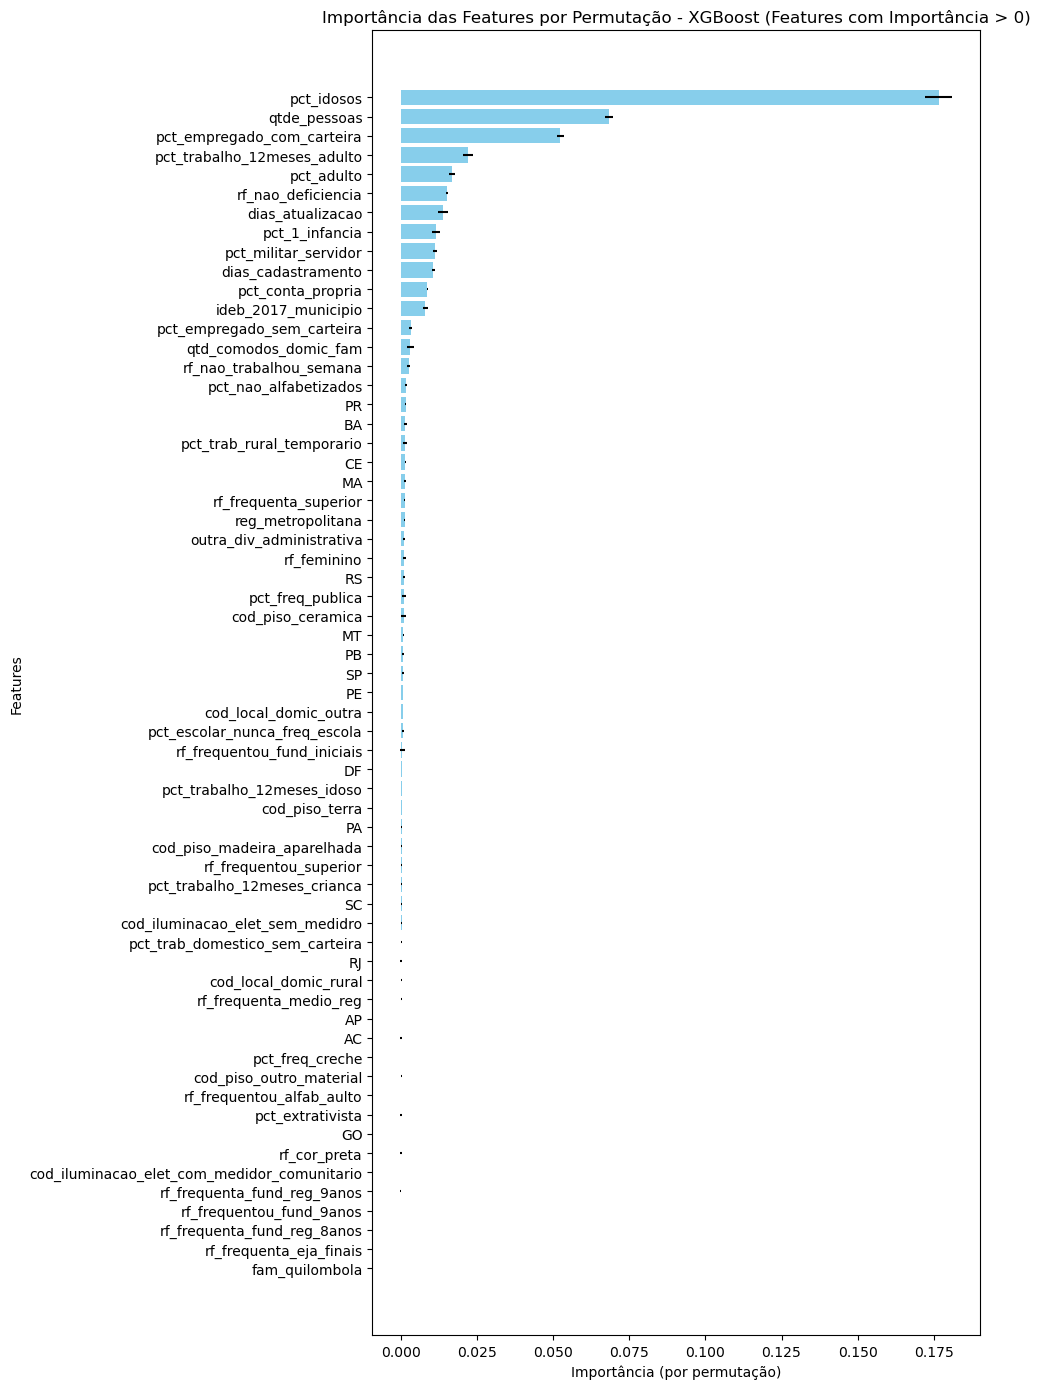

In [82]:
# Filtrar e ordenar dados para o modelo XGBoost
xgboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'XGBoost']
xgboost_group = xgboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo XGBoost
plt.figure(figsize=(10, 14))
plt.barh(xgboost_group['Feature'], xgboost_group['Importância'], 
         xerr=xgboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - XGBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


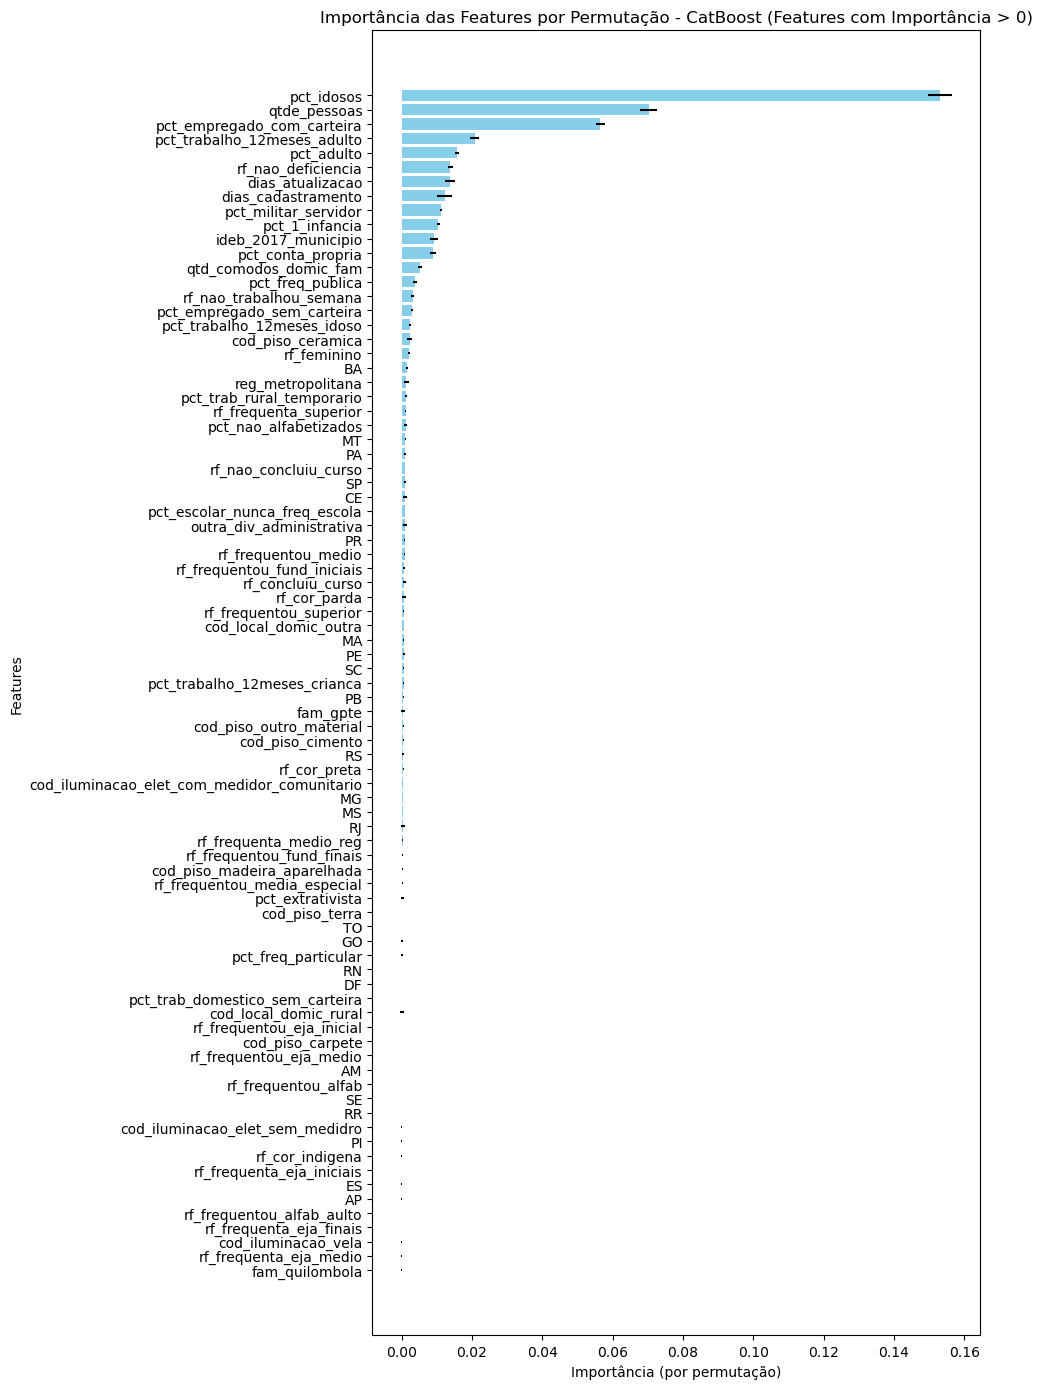

In [83]:
# Filtrar e ordenar dados para o modelo CatBoost
catboost_group = feature_importance_df[feature_importance_df['Modelo'] == 'CatBoost']
catboost_group = catboost_group.sort_values(by='Importância', ascending=False)

# Plotar para o modelo CatBoost
plt.figure(figsize=(10, 14))
plt.barh(catboost_group['Feature'], catboost_group['Importância'], 
         xerr=catboost_group['Desvio_Padrao'], color='skyblue')
plt.title("Importância das Features por Permutação - CatBoost (Features com Importância > 0)")
plt.xlabel('Importância (por permutação)')
plt.ylabel('Features')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [84]:
# Lista para armazenar os 10 principais features de cada modelo
top_10_features_per_model = {}

# Obter os 10 principais features para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar e ordenar as features para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    model_group = model_group.sort_values(by='Importância', ascending=False).head(10)
    
    # Adicionar ao dicionário
    top_10_features_per_model[model_name] = model_group[['Feature', 'Importância']]

# Exibir os 10 principais features de cada modelo
for model_name, top_features in top_10_features_per_model.items():
    print(f"\nTop 10 Features para o modelo {model_name}:\n")
    print(top_features.to_string(index=False))


Top 10 Features para o modelo RandomForest:

                    Feature  Importância
                 pct_idosos     0.082993
 pct_empregado_com_carteira     0.044269
               qtde_pessoas     0.039120
          pct_conta_propria     0.016771
             pct_1_infancia     0.015566
pct_trabalho_12meses_adulto     0.014033
         rf_nao_deficiencia     0.013689
           dias_atualizacao     0.008850
         dias_cadastramento     0.008248
        ideb_2017_municipio     0.006956

Top 10 Features para o modelo XGBoost:

                    Feature  Importância
                 pct_idosos     0.176593
               qtde_pessoas     0.068392
 pct_empregado_com_carteira     0.052413
pct_trabalho_12meses_adulto     0.022040
                 pct_adulto     0.016926
         rf_nao_deficiencia     0.015238
           dias_atualizacao     0.013809
             pct_1_infancia     0.011605
       pct_militar_servidor     0.011364
         dias_cadastramento     0.010693

Top 10 Fea

In [85]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]

# Exibir as features com importância maior que a mediana para cada modelo
for model_name, important_features in important_features_per_model.items():
    print(f"\nFeatures com importância maior que a mediana para o modelo {model_name}:\n")
    print(important_features.to_string(index=False))



Features com importância maior que a mediana para o modelo RandomForest:

                        Feature  Importância
          qtd_comodos_domic_fam     0.003323
                   qtde_pessoas     0.039120
             dias_cadastramento     0.008248
               dias_atualizacao     0.008850
            ideb_2017_municipio     0.006956
              pct_conta_propria     0.016771
      pct_trab_rural_temporario     0.001412
     pct_empregado_sem_carteira     0.001291
     pct_empregado_com_carteira     0.044269
           pct_militar_servidor     0.006181
    pct_trabalho_12meses_adulto     0.014033
     pct_trabalho_12meses_idoso     0.000654
          pct_nao_alfabetizados     0.002376
              pct_n_freq_escola     0.000568
               pct_freq_publica     0.006646
                     pct_idosos     0.082993
                 pct_1_infancia     0.015566
                     pct_adulto     0.006526
             rf_nao_deficiencia     0.013689
                    rf_fe

In [86]:
# Dicionário para armazenar as features com importância maior que a mediana para cada modelo
important_features_per_model = {}

# Conjunto para consolidar todas as features importantes
consolidated_important_features = set()

# Filtrar as features que têm importância maior que a mediana para cada modelo
for model_name in feature_importance_df['Modelo'].unique():
    # Filtrar os dados para o modelo específico
    model_group = feature_importance_df[feature_importance_df['Modelo'] == model_name]
    
    # Calcular a mediana das importâncias para o modelo
    median_importance = model_group['Importância'].median()
    
    # Filtrar as features com importância maior que a mediana
    important_features = model_group[model_group['Importância'] > median_importance]
    
    # Adicionar ao dicionário
    important_features_per_model[model_name] = important_features[['Feature', 'Importância']]
    
    # Adicionar as features importantes ao conjunto consolidado
    consolidated_important_features.update(important_features['Feature'])

# Converter o conjunto consolidado em uma lista
consolidated_important_features_list = list(consolidated_important_features)

# Exibir as features consolidadas acima da mediana para os modelos
print("Features consolidadas com importância acima da mediana em pelo menos um dos modelos:")
for feature in consolidated_important_features_list:
    print(feature)

# Se precisar, você pode usar a lista consolidada depois
# consolidated_important_features_list


Features consolidadas com importância acima da mediana em pelo menos um dos modelos:
pct_trabalho_12meses_idoso
rf_frequentou_fund_iniciais
pct_trabalho_12meses_adulto
pct_idosos
outra_div_administrativa
rf_cor_parda
rf_frequentou_medio
PE
ideb_2017_municipio
rf_feminino
pct_empregado_sem_carteira
qtd_comodos_domic_fam
dias_cadastramento
GO
CE
MT
pct_militar_servidor
BA
MA
pct_escolar_nunca_freq_escola
rf_nao_concluiu_curso
rf_nao_trabalhou_semana
fam_gpte
pct_1_infancia
rf_nao_deficiencia
SP
rf_frequentou_superior
cod_local_domic_outra
pct_empregado_com_carteira
cod_piso_ceramica
PR
pct_n_freq_escola
dias_atualizacao
qtde_pessoas
PB
PA
RS
SC
reg_metropolitana
cod_local_domic_rural
pct_trab_rural_temporario
pct_freq_publica
rf_frequenta_superior
rf_concluiu_curso
RJ
pct_nao_alfabetizados
pct_adulto
cod_iluminacao_elet_sem_medidro
pct_conta_propria


## Retirando as features que não tiveram importância acima da mediana de cada modelo

In [87]:
df_balanceado.head()

,id_familia,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,ideb_2017_municipio,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_1_infancia,pct_adulto,fam_indigena,fam_quilombola,rf_nao_deficiencia,rf_feminino,rf_nao_trabalhou_semana,fam_gpte,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,reg_metropolitana,outra_div_administrativa,cod_local_domic_rural,cod_local_domic_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_concluiu_curso,rf_nao_concluiu_curso,classe_renda
0,4736936,0.142857,0.166667,0.500306,0.331317,0.574257,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.000,0.666667,0.0,0.0,0.0,0.0,0.000000,0.333333,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,2562870,0.238095,0.583333,0.268572,0.056452,0.554455,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125000,0.125,0.375000,0.0,0.0,0.0,0.0,0.375000,0.250000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1843654,0.238095,0.083333,0.297921,0.390457,0.495050,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.5,0.0,0.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1946851,0.285714,0.083333,0.121522,0.180108,0.514851,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,4194650,0.285714,0.166667,0.879700,0.385753,0.554455,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000,0.333333,0.0,0.0,0.0,0.

In [88]:
df_balanceado.shape

(96791, 108)

In [89]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao', 'ideb_2017_municipio', 'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario', 'pct_empregado_sem_carteira', 'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira', 'pct_militar_servidor', 'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular', 'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos', 'pct_1_infancia', 'pct_adulto', 'fam_indigena', 'fam_quilombola', 'rf_nao_deficiencia', 'rf_feminino', 'rf_nao_trabalhou_semana', 'fam_gpte', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', 'reg_metropolitana', 'outra_div_administrativa', 'cod_local_domic_rural', 'cod_local_domic_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_pi

In [90]:
# Supondo que df_balanceado seja o seu DataFrame original

# Garantir que apenas colunas que existem em df_balanceado sejam mantidas
colunas_existentes = [col for col in consolidated_important_features_list if col in df_balanceado.columns]

# Adicionar as colunas 'id_familia' e 'classe_renda' se elas existirem em df_balanceado
if 'id_familia' in df_balanceado.columns:
    colunas_existentes.append('id_familia')
if 'classe_renda' in df_balanceado.columns:
    colunas_existentes.append('classe_renda')

# Filtrar o DataFrame usando as colunas existentes
df_filtrado = df_balanceado[colunas_existentes]

# Exibir o DataFrame resultante
print("DataFrame filtrado com as features importantes e as colunas 'id_familia' e 'classe_renda':")
df_filtrado.head()

DataFrame filtrado com as features importantes e as colunas 'id_familia' e 'classe_renda':


,pct_trabalho_12meses_idoso,rf_frequentou_fund_iniciais,pct_trabalho_12meses_adulto,pct_idosos,outra_div_administrativa,rf_cor_parda,rf_frequentou_medio,PE,ideb_2017_municipio,rf_feminino,pct_empregado_sem_carteira,qtd_comodos_domic_fam,dias_cadastramento,GO,CE,MT,pct_militar_servidor,BA,MA,pct_escolar_nunca_freq_escola,rf_nao_concluiu_curso,rf_nao_trabalhou_semana,fam_gpte,pct_1_infancia,rf_nao_deficiencia,SP,rf_frequentou_superior,cod_local_domic_outra,pct_empregado_com_carteira,cod_piso_ceramica,PR,pct_n_freq_escola,dias_atualizacao,qtde_pessoas,PB,PA,RS,SC,reg_metropolitana,cod_local_domic_rural,pct_trab_rural_temporario,pct_freq_publica,rf_frequenta_superior,rf_concluiu_curso,RJ,pct_nao_alfabetizados,pct_adulto,cod_iluminacao_elet_sem_medidro,pct_conta_propria,id_familia,classe_renda
0,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.574257,1.0,0.0,0.142857,0.500306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.331317,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333,4736936,0
1,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.554455,1.0,0.0,0.238095,0.268572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.375000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.056452,0.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375000,0.0,0.0,0.0,0.125000,0.250000,0.0,0.000000,2562870,0
2,0.0,0.0,0.500000,0.0,1.0,0.0,1.0,0.0,0.495050,0.0,0.0,0.238095,0.297921,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.390457,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.500000,0.0,0.500000,1843654,0
3,0.0,1.0,0.500000,0.0,1.0,1.0,0.0,0.0,0.514851,1.0,0.0,0.285714,0.121522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.180108,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.500000,0.0,0.500000,1946851,0
4,0.0,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,0.554455,1.0,0.0,0.285714,0.879700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.385753,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.000000,0.666667,0.0,0.333333,4194650,0


In [91]:
df_filtrado.columns

Index(['pct_trabalho_12meses_idoso', 'rf_frequentou_fund_iniciais',
       'pct_trabalho_12meses_adulto', 'pct_idosos', 'outra_div_administrativa',
       'rf_cor_parda', 'rf_frequentou_medio', 'PE', 'ideb_2017_municipio',
       'rf_feminino', 'pct_empregado_sem_carteira', 'qtd_comodos_domic_fam',
       'dias_cadastramento', 'GO', 'CE', 'MT', 'pct_militar_servidor', 'BA',
       'MA', 'pct_escolar_nunca_freq_escola', 'rf_nao_concluiu_curso',
       'rf_nao_trabalhou_semana', 'fam_gpte', 'pct_1_infancia',
       'rf_nao_deficiencia', 'SP', 'rf_frequentou_superior',
       'cod_local_domic_outra', 'pct_empregado_com_carteira',
       'cod_piso_ceramica', 'PR', 'pct_n_freq_escola', 'dias_atualizacao',
       'qtde_pessoas', 'PB', 'PA', 'RS', 'SC', 'reg_metropolitana',
       'cod_local_domic_rural', 'pct_trab_rural_temporario',
       'pct_freq_publica', 'rf_frequenta_superior', 'rf_concluiu_curso', 'RJ',
       'pct_nao_alfabetizados', 'pct_adulto',
       'cod_iluminacao_elet_sem_medi

In [92]:
df_filtrado.columns

Index(['pct_trabalho_12meses_idoso', 'rf_frequentou_fund_iniciais',
       'pct_trabalho_12meses_adulto', 'pct_idosos', 'outra_div_administrativa',
       'rf_cor_parda', 'rf_frequentou_medio', 'PE', 'ideb_2017_municipio',
       'rf_feminino', 'pct_empregado_sem_carteira', 'qtd_comodos_domic_fam',
       'dias_cadastramento', 'GO', 'CE', 'MT', 'pct_militar_servidor', 'BA',
       'MA', 'pct_escolar_nunca_freq_escola', 'rf_nao_concluiu_curso',
       'rf_nao_trabalhou_semana', 'fam_gpte', 'pct_1_infancia',
       'rf_nao_deficiencia', 'SP', 'rf_frequentou_superior',
       'cod_local_domic_outra', 'pct_empregado_com_carteira',
       'cod_piso_ceramica', 'PR', 'pct_n_freq_escola', 'dias_atualizacao',
       'qtde_pessoas', 'PB', 'PA', 'RS', 'SC', 'reg_metropolitana',
       'cod_local_domic_rural', 'pct_trab_rural_temporario',
       'pct_freq_publica', 'rf_frequenta_superior', 'rf_concluiu_curso', 'RJ',
       'pct_nao_alfabetizados', 'pct_adulto',
       'cod_iluminacao_elet_sem_medi

## Dividindo as features e a variável target

In [93]:
df_filtrado.columns

Index(['pct_trabalho_12meses_idoso', 'rf_frequentou_fund_iniciais',
       'pct_trabalho_12meses_adulto', 'pct_idosos', 'outra_div_administrativa',
       'rf_cor_parda', 'rf_frequentou_medio', 'PE', 'ideb_2017_municipio',
       'rf_feminino', 'pct_empregado_sem_carteira', 'qtd_comodos_domic_fam',
       'dias_cadastramento', 'GO', 'CE', 'MT', 'pct_militar_servidor', 'BA',
       'MA', 'pct_escolar_nunca_freq_escola', 'rf_nao_concluiu_curso',
       'rf_nao_trabalhou_semana', 'fam_gpte', 'pct_1_infancia',
       'rf_nao_deficiencia', 'SP', 'rf_frequentou_superior',
       'cod_local_domic_outra', 'pct_empregado_com_carteira',
       'cod_piso_ceramica', 'PR', 'pct_n_freq_escola', 'dias_atualizacao',
       'qtde_pessoas', 'PB', 'PA', 'RS', 'SC', 'reg_metropolitana',
       'cod_local_domic_rural', 'pct_trab_rural_temporario',
       'pct_freq_publica', 'rf_frequenta_superior', 'rf_concluiu_curso', 'RJ',
       'pct_nao_alfabetizados', 'pct_adulto',
       'cod_iluminacao_elet_sem_medi

In [94]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_filtrado[['PE', 'rf_nao_deficiencia', 'RJ', 'PA', 'outra_div_administrativa',
       'cod_local_domic_outra', 'rf_cor_parda',
       'pct_escolar_nunca_freq_escola', 'PB', 'pct_1_infancia',
       'rf_nao_trabalhou_semana', 'SP', 'CE', 'pct_conta_propria',
       'pct_trabalho_12meses_adulto', 'MA', 'dias_atualizacao',
       'pct_trab_rural_temporario', 'PR', 'qtd_comodos_domic_fam',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_idosos', 'pct_trabalho_12meses_idoso', 'ideb_2017_municipio',
       'rf_feminino', 'pct_n_freq_escola', 'RS', 'cod_piso_ceramica', 'BA',
       'reg_metropolitana', 'rf_frequentou_superior', 'GO', 'cod_piso_cimento',
       'rf_frequenta_superior', 'MT', 'pct_militar_servidor',
       'cod_iluminacao_elet_sem_medidro', 'pct_freq_publica', 'qtde_pessoas',
       'dias_cadastramento', 'pct_extrativista', 'cod_local_domic_rural',
       'pct_trabalho_12meses_crianca', 'SC', 'pct_nao_alfabetizados',
       'pct_adulto', 'fam_gpte']]
y = df_filtrado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

KeyError: "['cod_piso_cimento', 'pct_extrativista', 'pct_trabalho_12meses_crianca'] not in index"

In [ ]:
X.describe()

In [ ]:
X.isnull().sum().sum()

In [ ]:
y.isnull().sum()

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Fazendo a avaliação usando apenas as features mais importantes

In [ ]:
# Definir os modelos e os parâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=random_state),
        'param_grid': {
            'classifier__n_estimators': [300],
            'classifier__max_depth': [None, 20, 30],
             'min_samples_split': [2,5]
             }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [200, 300],
            'classifier__max_depth': [10, 20],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True, random_state=random_state),
        'param_grid': {
            'classifier__iterations': [200, 500],
            'classifier__depth': [7, 9],
            'classifier__learning_rate': [0.1],
            'classifier__loss_function':['MultiClass']
        }
    }
}

# Here

In [ ]:
# Definir GridSearchCV
grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Armazenar o melhor modelo
best_models[model_name] = grid_search.best_estimator_

# Armazenar os melhores hiperparâmetros
best_params = grid_search.best_params_

# Avaliar o modelo
y_pred = grid_search.predict(X_test)  # Usar o grid_search para prever
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Adicionar os resultados à lista
results=[]
results.append({
    'Modelo': model_name,
    'Melhores Hiperparâmetros': best_params,
    'F1 Score': f1,
    'Acurácia': accuracy
})

In [ ]:
results

In [ ]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

# Criar uma lista para armazenar os resultados
results = []

# Criar o modelo e fazer GridSearchCV
for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        #('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])
    
    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    
    # Armazenar os melhores hiperparâmetros
    best_params = grid_search.best_params_
    
    # Avaliar o modelo
    y_pred = grid_search.predict(X_test)  # Usar o grid_search para prever
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Adicionar os resultados à lista
    results.append({
        'Modelo': model_name,
        'Melhores Hiperparâmetros': best_params,
        'F1 Score': f1,
        'Acurácia': accuracy
    })

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Exibir o DataFrame
results_df.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Avaliar todos os modelos e plotar a curva ROC para FNR e TNR
for model_name, model in best_models.items():
    # Prevendo as probabilidades para cada classe
    y_scores = model.predict_proba(X_test)  # Prevendo as probabilidades para todas as classes

    # Criar uma figura para cada modelo
    plt.figure(figsize=(10, 6))
    
    # Variáveis para armazenar as melhores FNR para cada classe e o limiar correspondente
    best_fnr_per_class = {}
    best_threshold_per_class = {}

    for i in range(y_scores.shape[1]):
        # Calcular a curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)
        
        # Calcular TNR e FNR
        tnr = 1 - fpr  # Taxa de Verdadeiros Negativos (TNR)
        fnr = 1 - tpr  # Taxa de Falsos Negativos (FNR)
        
        # Calcular a AUC
        roc_auc = auc(fpr, tpr)

        # Encontrar o limiar que minimiza a FNR para a classe atual
        best_fnr_idx = np.argmin(fnr)
        best_fnr = fnr[best_fnr_idx]
        best_threshold = thresholds[best_fnr_idx]

        # Armazenar os melhores valores para a classe atual
        best_fnr_per_class[i] = best_fnr
        best_threshold_per_class[i] = best_threshold

        # Plotando a curva FNR vs. TNR
        plt.plot(fnr, tnr, label='Classe {} (Área = {:.2f})'.format(i, roc_auc))

    # Exibir os melhores valores de FNR para cada classe
    print(f"Modelo: {model_name}")
    for cls, fnr_value in best_fnr_per_class.items():
        print(f"  Melhor FNR para a classe {cls}: {fnr_value:.2f} com limiar {best_threshold_per_class[cls]:.2f}")

    # Linha de referência
    plt.plot([0, 1], [1, 0], color='red', linestyle='--')  # Linha de referência para FNR e TNR

    # Configurações do gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Negativos')
    plt.ylabel('Taxa de Verdadeiros Negativos')
    plt.title(f'Curva ROC (FNR vs TNR) para o modelo: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [ ]:
# Ajustando os limiares de decisão dos modelos para observar como os valores de FPR (Taxa de Falsos Positivos) e TPR (Taxa de Verdadeiros Positivos) mudam,
# e incluir métricas adicionais como o F1-score e balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Avaliar todos os modelos e plotar a curva ROC usando FPR
for model_name, model in best_models.items():
    # Prevendo as probabilidades para cada classe
    y_scores = model.predict_proba(X_test)  # Prevendo as probabilidades para todas as classes

    # Plotar a curva ROC para cada classe
    plt.figure(figsize=(10, 6))
    
    for i in range(y_scores.shape[1]):
        # Calcular a curva ROC para cada classe
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)
        
        # Calcular a AUC
        roc_auc = auc(fpr, tpr)

        # Plotando a curva FPR vs. TPR (Curva ROC tradicional)
        plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

    # Linha de referência
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Classificação Aleatória')  # Linha de referência para ROC

    # Configurações do gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title(f'Curva ROC para o modelo: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Identificar o melhor limiar que minimiza os falsos positivos para cada classe
    for i in range(y_scores.shape[1]):
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i], pos_label=i)
        # Encontra o índice do menor FPR
        best_threshold_index = np.argmin(fpr)
        best_fpr = fpr[best_threshold_index]
        best_threshold = thresholds[best_threshold_index]
        print(f"Modelo: {model_name}")
        print(f"  Melhor FPR para a classe {i}: {best_fpr:.2f} com limiar {best_threshold:.2f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, balanced_accuracy_score
from sklearn.metrics import classification_report

# Função para ajustar o limiar e calcular métricas
def adjust_thresholds(model, X_test, y_test, thresholds=np.arange(0.0, 1.1, 0.1)):
    y_probs = model.predict_proba(X_test)
    best_thresholds = {}
    
    for i in range(y_probs.shape[1]):  # Para cada classe
        f1_scores = []
        balanced_accuracies = []
        
        # Calcular a curva ROC para a classe
        fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Classe {i} - AUC: {auc(fpr, tpr):.2f}')
        
        for threshold in thresholds:
            # Ajustar o limiar para a classe 'i'
            y_pred_threshold = (y_probs[:, i] >= threshold).astype(int)
            
            # Calcular métricas para a classe
            f1 = precision_recall_fscore_support(y_test, y_pred_threshold, average='macro', zero_division=0)[2]
            balanced_acc = balanced_accuracy_score(y_test == i, y_pred_threshold)
            
            f1_scores.append(f1)
            balanced_accuracies.append(balanced_acc)
        
        # Identificar o melhor threshold com base na métrica que deseja otimizar
        best_idx = np.argmax(balanced_accuracies)  # Exemplo: escolher o que maximiza a balanced accuracy
        best_thresholds[i] = {
            'threshold': thresholds[best_idx],
            'F1_score': f1_scores[best_idx],
            'balanced_accuracy': balanced_accuracies[best_idx]
        }
    
    # Plotar a curva ROC para todas as classes
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC com Ajuste de Threshold')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    return best_thresholds

# Lista para armazenar os resultados de thresholds
thresholds_results = []

# Exemplo de uso para ajustar thresholds em um dos melhores modelos
for model_name, model in best_models.items():
    print(f"Ajustando thresholds para o modelo: {model_name}")
    best_thresholds = adjust_thresholds(model, X_test, y_test)
    print(f"Melhores thresholds para {model_name}: {best_thresholds}")
    
    # Previsões ajustadas usando o melhor threshold encontrado
    y_pred_adjusted = np.argmax(model.predict_proba(X_test), axis=1)
    
    # Geração do relatório de classificação com o parâmetro zero_division=0
    report = classification_report(y_test, y_pred_adjusted, zero_division=0)
    print(f"Relatório de classificação para {model_name} com ajuste de threshold:")
    print(report)
    
    # Armazenar os resultados em thresholds_results
    for class_index, metrics in best_thresholds.items():
        thresholds_results.append({
            'Modelo': model_name,
            'Classe': class_index,
            'Melhor Threshold': metrics['threshold'],
            'F1 Score': metrics['F1_score'],
            'Balanced Accuracy': metrics['balanced_accuracy']
        })

# Criar um DataFrame com os resultados de thresholds
thresholds_results_df = pd.DataFrame(thresholds_results)

# Concatenar com o results_df
final_results_df = pd.concat([results_df, thresholds_results_df], ignore_index=True)

# Exibir o DataFrame final
final_results_df.head()



In [ ]:
# Exibir o DataFrame final
final_results_df.head(20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Acessando o final_results_df
final_results_df = pd.DataFrame(final_results_df)

# Filtrando apenas os resultados do CatBoost e as métricas relevantes
catboost_results = final_results_df[final_results_df['Modelo'] == 'CatBoost']

# Reshape do DataFrame para long format para visualização
catboost_melted = catboost_results.melt(id_vars=['Modelo', 'Classe'], 
                                          value_vars=['F1 Score', 'Balanced Accuracy'], 
                                          var_name='Métrica', 
                                          value_name='Valor')

# Criar o gráfico de barras para CatBoost
plt.figure(figsize=(10, 6))
sns.barplot(data=catboost_melted, x='Classe', y='Valor', hue='Métrica', palette='Blues')
plt.title('Comparação de Métricas do Modelo CatBoost')
plt.xlabel('Classe')
plt.ylabel('Valor das Métricas')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Métrica')
plt.show()

# Para visualizar os melhores thresholds para cada classe do CatBoost
best_thresholds = catboost_results[['Classe', 'Melhor Threshold']].set_index('Classe')

print("Melhores Thresholds para o CatBoost:")
print(best_thresholds)